**PROGRAMMING ASSIGNMENT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras_preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


**Downloading Dataset**

In [2]:
!wget "https://s3-us-west-1.amazonaws.com/places-image-dataset/Image/Dataset.zip"
!unzip Dataset.zip

--2018-10-26 20:05:15--  https://s3-us-west-1.amazonaws.com/places-image-dataset/Image/Dataset.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.21
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2508774431 (2.3G) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>]   2.34G  11.2MB/s    in 3m 35s  

2018-10-26 20:08:50 (11.1 MB/s) - ‘Dataset.zip’ saved [2508774431/2508774431]

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/Dataset/
  inflating: __MACOSX/Dataset/._.DS_Store  
   creating: Dataset/Test/
  inflating: Dataset/Test/.DS_Store  
   creating: __MACOSX/Dataset/Test/
  inflating: __MACOSX/Dataset/Test/._.DS_Store  
   creating: Dataset/Test/airport_inside/
  inflating: Dataset/Test/airport_inside/airport_inside_0092.jpg  
 

  inflating: Dataset/Test/airport_inside/airport_inside_0159.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_inside_0159.jpg  
  inflating: Dataset/Test/airport_inside/airport_inside_0160.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_inside_0160.jpg  
  inflating: Dataset/Test/airport_inside/airport_inside_0161.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_inside_0161.jpg  
  inflating: Dataset/Test/airport_inside/airport_inside_0162.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_inside_0162.jpg  
  inflating: Dataset/Test/airport_inside/airport_inside_0163.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_inside_0163.jpg  
  inflating: Dataset/Test/airport_inside/airport_inside_0164.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_inside_0164.jpg  
  inflating: Dataset/Test/airport_inside/airport_inside_0165.jpg  
  inflating: __MACOSX/Dataset/Test/airport_inside/._airport_ins

  inflating: Dataset/Test/bakery/bakery_20_09_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_20_09_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_01_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21_01_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_02_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21_02_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_04_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21_04_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_05_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21_05_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_06_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21_06_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_08_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21_08_yahoo.jpg  
  inflating: Dataset/Test/bakery/bakery_21_10_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/bakery/._bakery_21

  inflating: __MACOSX/Dataset/Test/bar/._bar_0136.jpg  
  inflating: Dataset/Test/bar/bar_0137.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0137.jpg  
  inflating: Dataset/Test/bar/bar_0138.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0138.jpg  
  inflating: Dataset/Test/bar/bar_0139.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0139.jpg  
  inflating: Dataset/Test/bar/bar_0140.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0140.jpg  
  inflating: Dataset/Test/bar/bar_0141.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0141.jpg  
  inflating: Dataset/Test/bar/bar_0142.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0142.jpg  
  inflating: Dataset/Test/bar/bar_0143.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0143.jpg  
  inflating: Dataset/Test/bar/bar_0144.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0144.jpg  
  inflating: Dataset/Test/bar/bar_0145.jpg  
  inflating: __MACOSX/Dataset/Test/bar/._bar_0145.jpg  
  inflating: Dataset/Test/bar/bar_0

  inflating: Dataset/Test/bedroom/imagem_003.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._imagem_003.jpg  
  inflating: Dataset/Test/bedroom/imagen_016.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._imagen_016.jpg  
  inflating: Dataset/Test/bedroom/IMG_0025.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._IMG_0025.jpg  
  inflating: Dataset/Test/bedroom/IMG_0026.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._IMG_0026.jpg  
  inflating: Dataset/Test/bedroom/IMG_0028.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._IMG_0028.jpg  
  inflating: Dataset/Test/bedroom/img_0035.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._img_0035.jpg  
  inflating: Dataset/Test/bedroom/img_0076.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._img_0076.jpg  
  inflating: Dataset/Test/bedroom/img_0103.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._img_0103.jpg  
  inflating: Dataset/Test/bedroom/img_0118.jpg  
  inflating: __MACOSX/Dataset/Test/bedroom/._img_0118.jpg  
  inflating

  inflating: Dataset/Test/bookstore/bookstore_16_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_16_24_flickr.jpg  
  inflating: Dataset/Test/bookstore/bookstore_17_02_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_17_02_flickr.jpg  
  inflating: Dataset/Test/bookstore/bookstore_17_08_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_17_08_flickr.jpg  
  inflating: Dataset/Test/bookstore/bookstore_17_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_17_10_altavista.jpg  
  inflating: Dataset/Test/bookstore/bookstore_17_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_17_13_altavista.jpg  
  inflating: Dataset/Test/bookstore/bookstore_19_03_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_19_03_flickr.jpg  
  inflating: Dataset/Test/bookstore/bookstore_19_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/bookstore/._bookstore_19_13_altavista.j

  inflating: Dataset/Test/casino/casino_0116.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0116.jpg  
  inflating: Dataset/Test/casino/casino_0117.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0117.jpg  
  inflating: Dataset/Test/casino/casino_0118.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0118.jpg  
  inflating: Dataset/Test/casino/casino_0119.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0119.jpg  
  inflating: Dataset/Test/casino/casino_0120.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0120.jpg  
  inflating: Dataset/Test/casino/casino_0121.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0121.jpg  
  inflating: Dataset/Test/casino/casino_0122.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0122.jpg  
  inflating: Dataset/Test/casino/casino_0123.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._casino_0123.jpg  
  inflating: Dataset/Test/casino/casino_0124.jpg  
  inflating: __MACOSX/Dataset/Test/casino/._c

  inflating: Dataset/Test/church_inside/eglise_hugo.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._eglise_hugo.jpg  
  inflating: Dataset/Test/church_inside/Eglise_Louise_4_jpg_72d14.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._Eglise_Louise_4_jpg_72d14.jpg  
  inflating: Dataset/Test/church_inside/eglise_st_pierre_1893_full.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._eglise_st_pierre_1893_full.jpg  
  inflating: Dataset/Test/church_inside/EglisePC1.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._EglisePC1.jpg  
  inflating: Dataset/Test/church_inside/FreeFoto_castle_26_8.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._FreeFoto_castle_26_8.jpg  
  inflating: Dataset/Test/church_inside/FreeFoto_castle_30_33.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._FreeFoto_castle_30_33.jpg  
  inflating: Dataset/Test/church_inside/FreeFoto_castle_30_36.jpg  
  inflating: __MACOSX/Dataset/Test/church_inside/._FreeFoto_castle_30_36.jpg  

  inflating: Dataset/Test/computerroom/CompLab.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._CompLab.jpg  
  inflating: Dataset/Test/computerroom/comproom3456.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._comproom3456.jpg  
  inflating: Dataset/Test/computerroom/comproom348.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._comproom348.jpg  
  inflating: Dataset/Test/computerroom/comproom3lrg.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._comproom3lrg.jpg  
  inflating: Dataset/Test/computerroom/computadores.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._computadores.jpg  
  inflating: Dataset/Test/computerroom/computer.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._computer.jpg  
  inflating: Dataset/Test/computerroom/Computer8i7.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._Computer8i7.jpg  
  inflating: Dataset/Test/computerroom/computer_2520classroom.jpg  
  inflating: __MACOSX/Dataset/Test/computerroom/._computer_2520cl

  inflating: Dataset/Test/corridor/corridor65.jpg  
  inflating: __MACOSX/Dataset/Test/corridor/._corridor65.jpg  
  inflating: Dataset/Test/corridor/corridor67.jpg  
  inflating: __MACOSX/Dataset/Test/corridor/._corridor67.jpg  
  inflating: Dataset/Test/corridor/corridor69.jpg  
  inflating: __MACOSX/Dataset/Test/corridor/._corridor69.jpg  
  inflating: Dataset/Test/corridor/corridor73.jpg  
  inflating: __MACOSX/Dataset/Test/corridor/._corridor73.jpg  
  inflating: Dataset/Test/corridor/Corridor79.jpg  
  inflating: __MACOSX/Dataset/Test/corridor/._Corridor79.jpg  
  inflating: Dataset/Test/corridor/Corridor9.jpg  
  inflating: __MACOSX/Dataset/Test/corridor/._Corridor9.jpg  
   creating: Dataset/Test/deli/
  inflating: Dataset/Test/deli/deli_09_06_yahoo.jpg  
   creating: __MACOSX/Dataset/Test/deli/
  inflating: __MACOSX/Dataset/Test/deli/._deli_09_06_yahoo.jpg  
  inflating: Dataset/Test/deli/deli_09_10_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/deli/._deli_09_10_yahoo.jpg  
 

  inflating: Dataset/Test/dining_room/dining013.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining013.jpg  
  inflating: Dataset/Test/dining_room/dining014.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining014.jpg  
  inflating: Dataset/Test/dining_room/dining015.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining015.jpg  
  inflating: Dataset/Test/dining_room/dining016.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining016.jpg  
  inflating: Dataset/Test/dining_room/dining017.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining017.jpg  
  inflating: Dataset/Test/dining_room/dining018.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining018.jpg  
  inflating: Dataset/Test/dining_room/dining019.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining019.jpg  
  inflating: Dataset/Test/dining_room/dining020.jpg  
  inflating: __MACOSX/Dataset/Test/dining_room/._dining020.jpg  
  inflating: Dataset/Test/dining_room/dining021.

  inflating: Dataset/Test/florist/floreria_05_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/florist/._floreria_05_13_flickr.jpg  
  inflating: Dataset/Test/florist/floreria_05_17_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/florist/._floreria_05_17_flickr.jpg  
   creating: Dataset/Test/gameroom/
  inflating: Dataset/Test/gameroom/C034int6play_room1.jpg  
   creating: __MACOSX/Dataset/Test/gameroom/
  inflating: __MACOSX/Dataset/Test/gameroom/._C034int6play_room1.jpg  
  inflating: Dataset/Test/gameroom/CA_97_5_294_22_l.jpg  
  inflating: __MACOSX/Dataset/Test/gameroom/._CA_97_5_294_22_l.jpg  
  inflating: Dataset/Test/gameroom/Catskill_Hall_Recreational_Room.jpg  
  inflating: __MACOSX/Dataset/Test/gameroom/._Catskill_Hall_Recreational_Room.jpg  
  inflating: Dataset/Test/gameroom/doc0003.jpg  
  inflating: __MACOSX/Dataset/Test/gameroom/._doc0003.jpg  
  inflating: Dataset/Test/gameroom/fac_gameroom.jpg  
  inflating: __MACOSX/Dataset/Test/gameroom/._fac_gameroom.jpg  
  infl

  inflating: Dataset/Test/gym/gimnasio_167_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_167_13_flickr.jpg  
  inflating: Dataset/Test/gym/gimnasio_168_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_168_13_flickr.jpg  
  inflating: Dataset/Test/gym/gimnasio_168_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_168_22_flickr.jpg  
  inflating: Dataset/Test/gym/gimnasio_17_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_17_07_altavista.jpg  
  inflating: Dataset/Test/gym/gimnasio_17_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_17_08_altavista.jpg  
  inflating: Dataset/Test/gym/gimnasio_18_01_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_18_01_altavista.jpg  
  inflating: Dataset/Test/gym/gimnasio_18_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/gym/._gimnasio_18_07_altavista.jpg  
  inflating: Dataset/Test/gym/gimnasio_18_11_altavista.jpg  
  inflating: __MACOS

  inflating: Dataset/Test/inside_bus/inside_bus_017.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_017.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_018.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_018.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_019.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_019.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_020.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_020.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_021.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_021.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_022.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_022.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_023.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._inside_bus_023.jpg  
  inflating: Dataset/Test/inside_bus/inside_bus_024.jpg  
  inflating: __MACOSX/Dataset/Test/inside_bus/._insid

  inflating: Dataset/Test/inside_subway/inside_subway_0133.jpg  
  inflating: __MACOSX/Dataset/Test/inside_subway/._inside_subway_0133.jpg  
  inflating: Dataset/Test/inside_subway/inside_subway_0134.jpg  
  inflating: __MACOSX/Dataset/Test/inside_subway/._inside_subway_0134.jpg  
  inflating: Dataset/Test/inside_subway/inside_subway_0135.jpg  
  inflating: __MACOSX/Dataset/Test/inside_subway/._inside_subway_0135.jpg  
  inflating: Dataset/Test/inside_subway/inside_subway_0136.jpg  
  inflating: __MACOSX/Dataset/Test/inside_subway/._inside_subway_0136.jpg  
   creating: Dataset/Test/jewelleryshop/
  inflating: Dataset/Test/jewelleryshop/281208.jpg  
   creating: __MACOSX/Dataset/Test/jewelleryshop/
  inflating: __MACOSX/Dataset/Test/jewelleryshop/._281208.jpg  
  inflating: Dataset/Test/jewelleryshop/28208.jpg  
  inflating: __MACOSX/Dataset/Test/jewelleryshop/._28208.jpg  
  inflating: Dataset/Test/jewelleryshop/299846537.jpg  
  inflating: __MACOSX/Dataset/Test/jewelleryshop/._299846

  inflating: Dataset/Test/kitchen/img_0015.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0015.jpg  
  inflating: Dataset/Test/kitchen/img_0016.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0016.jpg  
  inflating: Dataset/Test/kitchen/img_0017.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0017.jpg  
  inflating: Dataset/Test/kitchen/img_0033.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0033.jpg  
  inflating: Dataset/Test/kitchen/img_0037.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0037.jpg  
  inflating: Dataset/Test/kitchen/img_0054.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0054.jpg  
  inflating: Dataset/Test/kitchen/img_0064.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0064.jpg  
  inflating: Dataset/Test/kitchen/img_0073.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0073.jpg  
  inflating: Dataset/Test/kitchen/img_0083.jpg  
  inflating: __MACOSX/Dataset/Test/kitchen/._img_0083.jpg  
  inflating: Datase

  inflating: Dataset/Test/laundromat/Copy_2_of_UNIONTOWN_LAUNDROMAT_005_1_.jpg  
   creating: __MACOSX/Dataset/Test/laundromat/
  inflating: __MACOSX/Dataset/Test/laundromat/._Copy_2_of_UNIONTOWN_LAUNDROMAT_005_1_.jpg  
  inflating: Dataset/Test/laundromat/df_11_0.jpg  
  inflating: __MACOSX/Dataset/Test/laundromat/._df_11_0.jpg  
  inflating: Dataset/Test/laundromat/DSC00479_800x600.jpg  
  inflating: __MACOSX/Dataset/Test/laundromat/._DSC00479_800x600.jpg  
  inflating: Dataset/Test/laundromat/DSC01042.jpg  
  inflating: __MACOSX/Dataset/Test/laundromat/._DSC01042.jpg  
  inflating: Dataset/Test/laundromat/DSC03063.jpg  
  inflating: __MACOSX/Dataset/Test/laundromat/._DSC03063.jpg  
  inflating: Dataset/Test/laundromat/DSCF0383_gross.jpg  
  inflating: __MACOSX/Dataset/Test/laundromat/._DSCF0383_gross.jpg  
  inflating: Dataset/Test/laundromat/DSCN0682.jpg  
  inflating: __MACOSX/Dataset/Test/laundromat/._DSCN0682.jpg  
  inflating: Dataset/Test/laundromat/DSCN6383.jpg  
  inflating:

  inflating: Dataset/Test/livingroom/img_0086.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._img_0086.jpg  
  inflating: Dataset/Test/livingroom/img_0121.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._img_0121.jpg  
  inflating: Dataset/Test/livingroom/IN102.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._IN102.jpg  
  inflating: Dataset/Test/livingroom/IN104.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._IN104.jpg  
  inflating: Dataset/Test/livingroom/IN105.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._IN105.jpg  
  inflating: Dataset/Test/livingroom/in108.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._in108.jpg  
  inflating: Dataset/Test/livingroom/indoor_0020.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._indoor_0020.jpg  
  inflating: Dataset/Test/livingroom/indoor_0021.jpg  
  inflating: __MACOSX/Dataset/Test/livingroom/._indoor_0021.jpg  
  inflating: Dataset/Test/livingroom/indoor_0038.jpg  
  inflating: __MACOSX/Dataset/Test/li

  inflating: Dataset/Test/locker_room/locker_room_google_0050.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._locker_room_google_0050.jpg  
  inflating: Dataset/Test/locker_room/locker_room_google_0051.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._locker_room_google_0051.jpg  
  inflating: Dataset/Test/locker_room/locker_room_google_0052.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._locker_room_google_0052.jpg  
  inflating: Dataset/Test/locker_room/locker_room_google_0053.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._locker_room_google_0053.jpg  
  inflating: Dataset/Test/locker_room/locker_room_google_0054.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._locker_room_google_0054.jpg  
  inflating: Dataset/Test/locker_room/locker_room_google_0055.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._locker_room_google_0055.jpg  
  inflating: Dataset/Test/locker_room/locker_room_google_0056.jpg  
  inflating: __MACOSX/Dataset/Test/locker_room/._l

  inflating: Dataset/Test/movietheater/auditorium620_38.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._auditorium620_38.jpg  
  inflating: Dataset/Test/movietheater/auditorium712_39.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._auditorium712_39.jpg  
  inflating: Dataset/Test/movietheater/auditorium799_40.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._auditorium799_40.jpg  
  inflating: Dataset/Test/movietheater/auditorium852_41.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._auditorium852_41.jpg  
  inflating: Dataset/Test/movietheater/auditorium913_17.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._auditorium913_17.jpg  
  inflating: Dataset/Test/movietheater/auditorium_resized_18.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._auditorium_resized_18.jpg  
  inflating: Dataset/Test/movietheater/big_daf36b3715dd4d6cfdfe52fa07d544f7_1__42.jpg  
  inflating: __MACOSX/Dataset/Test/movietheater/._big_daf36b3715dd4d6cfdfe52fa07d544f7_1__42

  inflating: Dataset/Test/office/homeoff014.jpg  
  inflating: __MACOSX/Dataset/Test/office/._homeoff014.jpg  
  inflating: Dataset/Test/office/homeoff015.jpg  
  inflating: __MACOSX/Dataset/Test/office/._homeoff015.jpg  
  inflating: Dataset/Test/office/img_0011.jpg  
  inflating: __MACOSX/Dataset/Test/office/._img_0011.jpg  
  inflating: Dataset/Test/office/img_0012.jpg  
  inflating: __MACOSX/Dataset/Test/office/._img_0012.jpg  
  inflating: Dataset/Test/office/img_0013.jpg  
  inflating: __MACOSX/Dataset/Test/office/._img_0013.jpg  
  inflating: Dataset/Test/office/img_0017.jpg  
  inflating: __MACOSX/Dataset/Test/office/._img_0017.jpg  
   creating: Dataset/Test/operating_room/
  inflating: Dataset/Test/operating_room/operating_room_08_18_altavista.jpg  
   creating: __MACOSX/Dataset/Test/operating_room/
  inflating: __MACOSX/Dataset/Test/operating_room/._operating_room_08_18_altavista.jpg  
  inflating: Dataset/Test/operating_room/operating_room_09_11_altavista.jpg  
  inflating:

  inflating: Dataset/Test/pantry/Pantry2891.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._Pantry2891.jpg  
  inflating: Dataset/Test/pantry/pantry2_1.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._pantry2_1.jpg  
  inflating: Dataset/Test/pantry/pantry456781.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._pantry456781.jpg  
  inflating: Dataset/Test/pantry/Pantry_003.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._Pantry_003.jpg  
  inflating: Dataset/Test/pantry/pantry_0166.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._pantry_0166.jpg  
  inflating: Dataset/Test/pantry/pantry_01_05_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._pantry_01_05_flickr.jpg  
  inflating: Dataset/Test/pantry/pantry_01_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._pantry_01_09_altavista.jpg  
  inflating: Dataset/Test/pantry/pantry_01_11_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/pantry/._pantry_01_11_flickr.jpg  
  inflating: Dataset/Test/pantry/pantry_01_12_al

  inflating: Dataset/Test/restaurant/L_Amadeus_Salle_de_Restaurant.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._L_Amadeus_Salle_de_Restaurant.jpg  
  inflating: Dataset/Test/restaurant/la_salle_restaurant.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._la_salle_restaurant.jpg  
  inflating: Dataset/Test/restaurant/mortonsdr.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._mortonsdr.jpg  
  inflating: Dataset/Test/restaurant/N190036.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._N190036.jpg  
  inflating: Dataset/Test/restaurant/N190059.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._N190059.jpg  
  inflating: Dataset/Test/restaurant/oaknew2.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._oaknew2.jpg  
  inflating: Dataset/Test/restaurant/olis_small.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._olis_small.jpg  
  inflating: Dataset/Test/restaurant/OriginalSteakhouse.jpg  
  inflating: __MACOSX/Dataset/Test/restaurant/._OriginalSteakhouse.jp

  inflating: Dataset/Test/shoeshop/706140700191528.jpg  
   creating: __MACOSX/Dataset/Test/shoeshop/
  inflating: __MACOSX/Dataset/Test/shoeshop/._706140700191528.jpg  
  inflating: Dataset/Test/shoeshop/75421439_6007807504.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._75421439_6007807504.jpg  
  inflating: Dataset/Test/shoeshop/75421584_9554abbb01.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._75421584_9554abbb01.jpg  
  inflating: Dataset/Test/shoeshop/9022k_1.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._9022k_1.jpg  
  inflating: Dataset/Test/shoeshop/bottom.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._bottom.jpg  
  inflating: Dataset/Test/shoeshop/Browns2.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._Browns2.jpg  
  inflating: Dataset/Test/shoeshop/Browns4.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._Browns4.jpg  
  inflating: Dataset/Test/shoeshop/cbra2.jpg  
  inflating: __MACOSX/Dataset/Test/shoeshop/._cbra2.jpg  
  inflating: Dataset/Test

  inflating: Dataset/Test/subway/subway_0067.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0067.jpg  
  inflating: Dataset/Test/subway/subway_0068.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0068.jpg  
  inflating: Dataset/Test/subway/subway_0069.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0069.jpg  
  inflating: Dataset/Test/subway/subway_0070.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0070.jpg  
  inflating: Dataset/Test/subway/subway_0071.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0071.jpg  
  inflating: Dataset/Test/subway/subway_0072.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0072.jpg  
  inflating: Dataset/Test/subway/subway_0073.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0073.jpg  
  inflating: Dataset/Test/subway/subway_0074.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._subway_0074.jpg  
  inflating: Dataset/Test/subway/subway_0075.jpg  
  inflating: __MACOSX/Dataset/Test/subway/._s

  inflating: Dataset/Test/toystore/jugueteria_03_12_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_03_12_flickr.jpg  
  inflating: Dataset/Test/toystore/jugueteria_04_03_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_04_03_flickr.jpg  
  inflating: Dataset/Test/toystore/jugueteria_04_07_yahoo.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_04_07_yahoo.jpg  
  inflating: Dataset/Test/toystore/jugueteria_04_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_04_10_altavista.jpg  
  inflating: Dataset/Test/toystore/jugueteria_04_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_04_24_flickr.jpg  
  inflating: Dataset/Test/toystore/jugueteria_05_02_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_05_02_flickr.jpg  
  inflating: Dataset/Test/toystore/jugueteria_05_03_flickr.jpg  
  inflating: __MACOSX/Dataset/Test/toystore/._jugueteria_05_03_flickr.jpg  
  inflati

  inflating: __MACOSX/Dataset/Test/waitingroom/._image004.jpg  
  inflating: Dataset/Test/waitingroom/IMG_0423.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._IMG_0423.jpg  
  inflating: Dataset/Test/waitingroom/IMG_1658.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._IMG_1658.jpg  
  inflating: Dataset/Test/waitingroom/JHC_2.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._JHC_2.jpg  
  inflating: Dataset/Test/waitingroom/JHC_3.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._JHC_3.jpg  
  inflating: Dataset/Test/waitingroom/JubileeMeetingRoom.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._JubileeMeetingRoom.jpg  
  inflating: Dataset/Test/waitingroom/lee1.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._lee1.jpg  
  inflating: Dataset/Test/waitingroom/lobby08.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._lobby08.jpg  
  inflating: Dataset/Test/waitingroom/lobby2.jpg  
  inflating: __MACOSX/Dataset/Test/waitingroom/._lobby2.jpg  
  infl

  inflating: Dataset/Test/warehouse/warehouse_0136.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0136.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0137.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0137.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0138.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0138.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0139.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0139.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0140.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0140.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0141.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0141.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0142.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0142.jpg  
  inflating: Dataset/Test/warehouse/warehouse_0143.jpg  
  inflating: __MACOSX/Dataset/Test/warehouse/._warehouse_0143.jpg  


  inflating: Dataset/Train/airport_inside/airport_inside_0194.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0194.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0195.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0195.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0196.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0196.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0197.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0197.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0198.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0198.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0199.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0199.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0200.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside

  inflating: Dataset/Train/airport_inside/airport_inside_0278.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0278.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0279.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0279.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0280.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0280.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0281.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0281.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0282.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0282.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0283.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0283.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0284.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside

  inflating: Dataset/Train/airport_inside/airport_inside_0343.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0343.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0344.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0344.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0345.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0345.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0346.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0346.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0347.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0347.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0348.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0348.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0350.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside

  inflating: Dataset/Train/airport_inside/airport_inside_0402.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0402.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0403.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0403.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0404.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0404.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0405.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0405.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0406.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0406.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0407.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0407.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0408.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside

  inflating: Dataset/Train/airport_inside/airport_inside_0463.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0463.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0464.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0464.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0465.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0465.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0466.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0466.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0467.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0467.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0468.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0468.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0469.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside

  inflating: Dataset/Train/airport_inside/airport_inside_0536.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0536.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0537.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0537.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0538.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0538.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0539.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0539.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0540.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0540.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0541.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside/._airport_inside_0541.jpg  
  inflating: Dataset/Train/airport_inside/airport_inside_0542.jpg  
  inflating: __MACOSX/Dataset/Train/airport_inside

  inflating: __MACOSX/Dataset/Train/artstudio/._art_painting_studio_38_15_altavista.jpg  
  inflating: Dataset/Train/artstudio/art_painting_studio_39_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._art_painting_studio_39_06_altavista.jpg  
  inflating: Dataset/Train/artstudio/art_painting_studio_43_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._art_painting_studio_43_06_altavista.jpg  
  inflating: Dataset/Train/artstudio/art_painting_studio_43_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._art_painting_studio_43_20_altavista.jpg  
  inflating: Dataset/Train/artstudio/art_painting_studio_44_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._art_painting_studio_44_08_altavista.jpg  
  inflating: Dataset/Train/artstudio/art_painting_studio_45_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._art_painting_studio_45_05_altavista.jpg  
  inflating: Dataset/Train/artstudio/art_painting_studio_47_02_al

  inflating: Dataset/Train/artstudio/estudio_de_pintor_03_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._estudio_de_pintor_03_04_altavista.jpg  
  inflating: Dataset/Train/artstudio/estudio_de_pintor_03_16_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._estudio_de_pintor_03_16_altavista.jpg  
  inflating: Dataset/Train/artstudio/estudio_de_pintor_06_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._estudio_de_pintor_06_02_altavista.jpg  
  inflating: Dataset/Train/artstudio/estudio_de_pintor_07_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._estudio_de_pintor_07_08_altavista.jpg  
  inflating: Dataset/Train/artstudio/famous_painters_studio_01_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._famous_painters_studio_01_12_altavista.jpg  
  inflating: Dataset/Train/artstudio/homeoff006.jpg  
  inflating: __MACOSX/Dataset/Train/artstudio/._homeoff006.jpg  
  inflating: Dataset/Train/artstudio/int12.jpg

  inflating: Dataset/Train/auditorium/baird_1__141.jpg  
  inflating: __MACOSX/Dataset/Train/auditorium/._baird_1__141.jpg  
  inflating: Dataset/Train/auditorium/bernard_20tschumi_3_popup_1__47.jpg  
  inflating: __MACOSX/Dataset/Train/auditorium/._bernard_20tschumi_3_popup_1__47.jpg  
  inflating: Dataset/Train/auditorium/booker_20twashingtonhs_auditorium450b_1__48.jpg  
  inflating: __MACOSX/Dataset/Train/auditorium/._booker_20twashingtonhs_auditorium450b_1__48.jpg  
  inflating: Dataset/Train/auditorium/c54884a_19601d8_b_1__142.jpg  
  inflating: __MACOSX/Dataset/Train/auditorium/._c54884a_19601d8_b_1__142.jpg  
  inflating: Dataset/Train/auditorium/callway_auditorium_overview_500_x_345_1__49.jpg  
  inflating: __MACOSX/Dataset/Train/auditorium/._callway_auditorium_overview_500_x_345_1__49.jpg  
  inflating: Dataset/Train/auditorium/concert_143.jpg  
  inflating: __MACOSX/Dataset/Train/auditorium/._concert_143.jpg  
  inflating: Dataset/Train/auditorium/costa_atlantica_navire_amphi

  inflating: Dataset/Train/bakery/boulangerie_10_10_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_10_10_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_10_13_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_10_13_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_10_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_10_15_altavista.jpg  
  inflating: Dataset/Train/bakery/boulangerie_11_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_11_11_altavista.jpg  
  inflating: Dataset/Train/bakery/boulangerie_11_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_11_12_altavista.jpg  
  inflating: Dataset/Train/bakery/boulangerie_11_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_11_13_altavista.jpg  
  inflating: Dataset/Train/bakery/boulangerie_12_06_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_12_06_yahoo.j

  inflating: Dataset/Train/bakery/boulangerie_44_18_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_44_18_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_46_06_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_46_06_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_47_07_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_47_07_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_47_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_47_14_altavista.jpg  
  inflating: Dataset/Train/bakery/boulangerie_48_07_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_48_07_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_49_14_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_49_14_yahoo.jpg  
  inflating: Dataset/Train/bakery/boulangerie_50_05_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._boulangerie_50_05_yahoo.jpg  
  inflating: Datase

  inflating: Dataset/Train/bakery/panaderia_04_02_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_04_02_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_04_09_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_04_09_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_04_11_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_04_11_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_04_15_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_04_15_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_05_09_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_05_09_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_05_16_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_05_16_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_05_18_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_05_18_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_05_20_yahoo

  inflating: Dataset/Train/bakery/panaderia_49_01_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_49_01_altavista.jpg  
  inflating: Dataset/Train/bakery/panaderia_49_03_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_49_03_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_49_08_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_49_08_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_49_18_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_49_18_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_49_21_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_49_21_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_51_21_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_51_21_yahoo.jpg  
  inflating: Dataset/Train/bakery/panaderia_buenos_aires_01_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bakery/._panaderia_buenos_aires_01_11_altavista.jpg  
  inflating: 

  inflating: Dataset/Train/bar/bar_0222.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0222.jpg  
  inflating: Dataset/Train/bar/bar_0223.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0223.jpg  
  inflating: Dataset/Train/bar/bar_0224.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0224.jpg  
  inflating: Dataset/Train/bar/bar_0225.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0225.jpg  
  inflating: Dataset/Train/bar/bar_0226.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0226.jpg  
  inflating: Dataset/Train/bar/bar_0227.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0227.jpg  
  inflating: Dataset/Train/bar/bar_0228.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0228.jpg  
  inflating: Dataset/Train/bar/bar_0229.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0229.jpg  
  inflating: Dataset/Train/bar/bar_0230.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0230.jpg  
  inflating: Dataset/Train/bar/bar_0231.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Train/bar/bar_0332.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0332.jpg  
  inflating: Dataset/Train/bar/bar_0333.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0333.jpg  
  inflating: Dataset/Train/bar/bar_0334.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0334.jpg  
  inflating: Dataset/Train/bar/bar_0335.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0335.jpg  
  inflating: Dataset/Train/bar/bar_0336.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0336.jpg  
  inflating: Dataset/Train/bar/bar_0337.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0337.jpg  
  inflating: Dataset/Train/bar/bar_0338.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0338.jpg  
  inflating: Dataset/Train/bar/bar_0339.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0339.jpg  
  inflating: Dataset/Train/bar/bar_0340.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0340.jpg  
  inflating: Dataset/Train/bar/bar_0341.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Train/bar/bar_0413.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0413.jpg  
  inflating: Dataset/Train/bar/bar_0414.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0414.jpg  
  inflating: Dataset/Train/bar/bar_0415.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0415.jpg  
  inflating: Dataset/Train/bar/bar_0416.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0416.jpg  
  inflating: Dataset/Train/bar/bar_0417.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0417.jpg  
  inflating: Dataset/Train/bar/bar_0418.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0418.jpg  
  inflating: Dataset/Train/bar/bar_0419.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0419.jpg  
  inflating: Dataset/Train/bar/bar_0420.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0420.jpg  
  inflating: Dataset/Train/bar/bar_0421.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0421.jpg  
  inflating: Dataset/Train/bar/bar_0422.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Train/bar/bar_0524.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0524.jpg  
  inflating: Dataset/Train/bar/bar_0525.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0525.jpg  
  inflating: Dataset/Train/bar/bar_0526.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0526.jpg  
  inflating: Dataset/Train/bar/bar_0527.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0527.jpg  
  inflating: Dataset/Train/bar/bar_0528.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0528.jpg  
  inflating: Dataset/Train/bar/bar_0529.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0529.jpg  
  inflating: Dataset/Train/bar/bar_0530.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0530.jpg  
  inflating: Dataset/Train/bar/bar_0531.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0531.jpg  
  inflating: Dataset/Train/bar/bar_0532.jpg  
  inflating: __MACOSX/Dataset/Train/bar/._bar_0532.jpg  
  inflating: Dataset/Train/bar/bar_0533.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Train/bathroom/IMG_1313.jpg  
   creating: __MACOSX/Dataset/Train/bathroom/
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1313.jpg  
  inflating: Dataset/Train/bathroom/IMG_1340.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1340.jpg  
  inflating: Dataset/Train/bathroom/IMG_1341.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1341.jpg  
  inflating: Dataset/Train/bathroom/IMG_1343.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1343.jpg  
  inflating: Dataset/Train/bathroom/IMG_1559.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1559.jpg  
  inflating: Dataset/Train/bathroom/IMG_1560.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1560.jpg  
  inflating: Dataset/Train/bathroom/IMG_1701.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1701.jpg  
  inflating: Dataset/Train/bathroom/IMG_1703.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._IMG_1703.jpg  
  inflating: Dataset/Train/bathroom/IMG_1704.jpg  

  inflating: Dataset/Train/bathroom/indoor_0486.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0486.jpg  
  inflating: Dataset/Train/bathroom/indoor_0489.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0489.jpg  
  inflating: Dataset/Train/bathroom/indoor_0491.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0491.jpg  
  inflating: Dataset/Train/bathroom/indoor_0493.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0493.jpg  
  inflating: Dataset/Train/bathroom/indoor_0498.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0498.jpg  
  inflating: Dataset/Train/bathroom/indoor_0513.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0513.jpg  
  inflating: Dataset/Train/bathroom/indoor_0531.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0531.jpg  
  inflating: Dataset/Train/bathroom/indoor_0566.jpg  
  inflating: __MACOSX/Dataset/Train/bathroom/._indoor_0566.jpg  
  inflating: Dataset/Train/bathroom/int17.jpg  


  inflating: Dataset/Train/bedroom/indoor_0306.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0306.jpg  
  inflating: Dataset/Train/bedroom/indoor_0307.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0307.jpg  
  inflating: Dataset/Train/bedroom/indoor_0308.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0308.jpg  
  inflating: Dataset/Train/bedroom/indoor_0322.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0322.jpg  
  inflating: Dataset/Train/bedroom/indoor_0323.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0323.jpg  
  inflating: Dataset/Train/bedroom/indoor_0330.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0330.jpg  
  inflating: Dataset/Train/bedroom/indoor_0331.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0331.jpg  
  inflating: Dataset/Train/bedroom/indoor_0332.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._indoor_0332.jpg  
  inflating: Dataset/Train/bedroom/indoor_0338.jpg  
  inflating

  inflating: Dataset/Train/bedroom/int202.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int202.jpg  
  inflating: Dataset/Train/bedroom/int203.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int203.jpg  
  inflating: Dataset/Train/bedroom/int206.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int206.jpg  
  inflating: Dataset/Train/bedroom/int207.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int207.jpg  
  inflating: Dataset/Train/bedroom/int208.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int208.jpg  
  inflating: Dataset/Train/bedroom/int212.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int212.jpg  
  inflating: Dataset/Train/bedroom/int213.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int213.jpg  
  inflating: Dataset/Train/bedroom/int215.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int215.jpg  
  inflating: Dataset/Train/bedroom/int216.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int216.jpg  
  inflating: Dataset/Train/bedroom/in

  inflating: Dataset/Train/bedroom/int647.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int647.jpg  
  inflating: Dataset/Train/bedroom/int649.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int649.jpg  
  inflating: Dataset/Train/bedroom/int694.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int694.jpg  
  inflating: Dataset/Train/bedroom/int701.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int701.jpg  
  inflating: Dataset/Train/bedroom/int702.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int702.jpg  
  inflating: Dataset/Train/bedroom/int703.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int703.jpg  
  inflating: Dataset/Train/bedroom/int704.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int704.jpg  
  inflating: Dataset/Train/bedroom/int708.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int708.jpg  
  inflating: Dataset/Train/bedroom/int709.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._int709.jpg  
  inflating: Dataset/Train/bedroom/in

  inflating: Dataset/Train/bedroom/pasadena_IMG_0158.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._pasadena_IMG_0158.jpg  
  inflating: Dataset/Train/bedroom/pasadena_IMG_0161.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._pasadena_IMG_0161.jpg  
  inflating: Dataset/Train/bedroom/PeaceRoom.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._PeaceRoom.jpg  
  inflating: Dataset/Train/bedroom/pen_woodnleather_sleighl.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._pen_woodnleather_sleighl.jpg  
  inflating: Dataset/Train/bedroom/PH-02-04-4682-01_l.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._PH-02-04-4682-01_l.jpg  
  inflating: Dataset/Train/bedroom/PH_02_01_5068_31_l.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._PH_02_01_5068_31_l.jpg  
  inflating: Dataset/Train/bedroom/PH_02_01_5078_05_l.jpg  
  inflating: __MACOSX/Dataset/Train/bedroom/._PH_02_01_5078_05_l.jpg  
  inflating: Dataset/Train/bedroom/ph_02_02_4677_13_l.jpg  
  inflating: __MACOSX/Dataset/Tra

  inflating: Dataset/Train/bookstore/bookstore_35_05_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_35_05_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_35_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_35_11_altavista.jpg  
  inflating: Dataset/Train/bookstore/bookstore_35_16_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_35_16_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_36_02_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_36_02_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_36_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_36_06_altavista.jpg  
  inflating: Dataset/Train/bookstore/bookstore_36_08_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_36_08_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_37_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_37_04_

  inflating: Dataset/Train/bookstore/bookstore_57_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_57_04_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_57_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_57_07_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_57_16_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_57_16_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_57_21_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_57_21_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_59_17_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_59_17_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_60_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_60_04_flickr.jpg  
  inflating: Dataset/Train/bookstore/bookstore_fromupstairs_1.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._bookstore_fromupstairs_1.j

  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_30_08_altavista.jpg  
  inflating: Dataset/Train/bookstore/Librairie_30_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_30_09_altavista.jpg  
  inflating: Dataset/Train/bookstore/Librairie_36_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_36_11_altavista.jpg  
  inflating: Dataset/Train/bookstore/Librairie_37_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_37_03_altavista.jpg  
  inflating: Dataset/Train/bookstore/Librairie_39_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_39_02_altavista.jpg  
  inflating: Dataset/Train/bookstore/Librairie_39_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_39_03_altavista.jpg  
  inflating: Dataset/Train/bookstore/Librairie_43_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Librairie_43_07_altavista.jpg  
  inflating: Dataset/Train

  inflating: Dataset/Train/bookstore/Libreria_23_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Libreria_23_17_altavista.jpg  
  inflating: Dataset/Train/bookstore/Libreria_24_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Libreria_24_11_altavista.jpg  
  inflating: Dataset/Train/bookstore/Libreria_25_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Libreria_25_02_altavista.jpg  
  inflating: Dataset/Train/bookstore/Libreria_25_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Libreria_25_04_altavista.jpg  
  inflating: Dataset/Train/bookstore/Libreria_26_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Libreria_26_09_altavista.jpg  
  inflating: Dataset/Train/bookstore/Libreria_26_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Libreria_26_13_altavista.jpg  
  inflating: Dataset/Train/bookstore/Libreria_27_16_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/bookstore/._Li

  inflating: Dataset/Train/bowling/bowling_0073.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0073.jpg  
  inflating: Dataset/Train/bowling/bowling_0074.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0074.jpg  
  inflating: Dataset/Train/bowling/bowling_0075.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0075.jpg  
  inflating: Dataset/Train/bowling/bowling_0076.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0076.jpg  
  inflating: Dataset/Train/bowling/bowling_0077.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0077.jpg  
  inflating: Dataset/Train/bowling/bowling_0078.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0078.jpg  
  inflating: Dataset/Train/bowling/bowling_0079.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0079.jpg  
  inflating: Dataset/Train/bowling/bowling_0080.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0080.jpg  
  inflating: Dataset/Train/bowling/bowling_0081.

  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0153.jpg  
  inflating: Dataset/Train/bowling/bowling_0154.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0154.jpg  
  inflating: Dataset/Train/bowling/bowling_0155.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0155.jpg  
  inflating: Dataset/Train/bowling/bowling_0156.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0156.jpg  
  inflating: Dataset/Train/bowling/bowling_0157.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0157.jpg  
  inflating: Dataset/Train/bowling/bowling_0158.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0158.jpg  
  inflating: Dataset/Train/bowling/bowling_0159.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0159.jpg  
  inflating: Dataset/Train/bowling/bowling_0160.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bowling_0160.jpg  
  inflating: Dataset/Train/bowling/bowling_0161.jpg  
  inflating: __MACOSX/Dataset/Train/bowling/._bo

  inflating: Dataset/Train/buffet/buffet2.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet2.jpg  
  inflating: Dataset/Train/buffet/buffet5.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet5.jpg  
  inflating: Dataset/Train/buffet/buffet57.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet57.jpg  
  inflating: Dataset/Train/buffet/buffet648.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet648.jpg  
  inflating: Dataset/Train/buffet/buffet678.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet678.jpg  
  inflating: Dataset/Train/buffet/buffet7013.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet7013.jpg  
  inflating: Dataset/Train/buffet/buffet87.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet87.jpg  
  inflating: Dataset/Train/buffet/buffet95.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._buffet95.jpg  
  inflating: Dataset/Train/buffet/Buffet_1.jpg  
  inflating: __MACOSX/Dataset/Train/buffet/._Buffet_1.jpg  
  inflating: Da

  inflating: Dataset/Train/casino/casino_0175.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0175.jpg  
  inflating: Dataset/Train/casino/casino_0176.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0176.jpg  
  inflating: Dataset/Train/casino/casino_0177.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0177.jpg  
  inflating: Dataset/Train/casino/casino_0178.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0178.jpg  
  inflating: Dataset/Train/casino/casino_0179.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0179.jpg  
  inflating: Dataset/Train/casino/casino_0180.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0180.jpg  
  inflating: Dataset/Train/casino/casino_0181.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0181.jpg  
  inflating: Dataset/Train/casino/casino_0182.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0182.jpg  
  inflating: Dataset/Train/casino/casino_0183.jpg  
  inflating: __MACOSX/Datase

  inflating: __MACOSX/Dataset/Train/casino/._casino_0316.jpg  
  inflating: Dataset/Train/casino/casino_0317.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0317.jpg  
  inflating: Dataset/Train/casino/casino_0318.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0318.jpg  
  inflating: Dataset/Train/casino/casino_0319.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0319.jpg  
  inflating: Dataset/Train/casino/casino_0320.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0320.jpg  
  inflating: Dataset/Train/casino/casino_0321.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0321.jpg  
  inflating: Dataset/Train/casino/casino_0322.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0322.jpg  
  inflating: Dataset/Train/casino/casino_0323.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0323.jpg  
  inflating: Dataset/Train/casino/casino_0324.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0324.jpg  
  inflating: Data

  inflating: Dataset/Train/casino/casino_0417.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0417.jpg  
  inflating: Dataset/Train/casino/casino_0418.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0418.jpg  
  inflating: Dataset/Train/casino/casino_0419.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0419.jpg  
  inflating: Dataset/Train/casino/casino_0420.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0420.jpg  
  inflating: Dataset/Train/casino/casino_0421.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0421.jpg  
  inflating: Dataset/Train/casino/casino_0422.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0422.jpg  
  inflating: Dataset/Train/casino/casino_0423.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0423.jpg  
  inflating: Dataset/Train/casino/casino_0424.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0424.jpg  
  inflating: Dataset/Train/casino/casino_0425.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/casino/casino_0501.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0501.jpg  
  inflating: Dataset/Train/casino/casino_0502.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0502.jpg  
  inflating: Dataset/Train/casino/casino_0503.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0503.jpg  
  inflating: Dataset/Train/casino/casino_0504.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0504.jpg  
  inflating: Dataset/Train/casino/casino_0505.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0505.jpg  
  inflating: Dataset/Train/casino/casino_0506.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0506.jpg  
  inflating: Dataset/Train/casino/casino_0507.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0507.jpg  
  inflating: Dataset/Train/casino/casino_0508.jpg  
  inflating: __MACOSX/Dataset/Train/casino/._casino_0508.jpg  
  inflating: Dataset/Train/casino/casino_0509.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/church_inside/iglesia2.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._iglesia2.jpg  
  inflating: Dataset/Train/church_inside/Iglesia_de_Glew.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._Iglesia_de_Glew.jpg  
  inflating: Dataset/Train/church_inside/Iglesia_del_Carmen.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._Iglesia_del_Carmen.jpg  
  inflating: Dataset/Train/church_inside/IglesiaDeLaMercedBurgos.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._IglesiaDeLaMercedBurgos.jpg  
  inflating: Dataset/Train/church_inside/Iguala_Iglesia.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._Iguala_Iglesia.jpg  
  inflating: Dataset/Train/church_inside/innenansicht_kirche.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._innenansicht_kirche.jpg  
  inflating: Dataset/Train/church_inside/Inside_a_large_church_Vienna.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._Inside_a_large_church_Vienna.jpg  
 

  inflating: Dataset/Train/church_inside/metropolitana_75_05_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._metropolitana_75_05_flickr.jpg  
  inflating: Dataset/Train/church_inside/metropolitana_79_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._metropolitana_79_07_flickr.jpg  
  inflating: Dataset/Train/church_inside/metropolitana_81_03_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._metropolitana_81_03_flickr.jpg  
  inflating: Dataset/Train/church_inside/metropolitana_83_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._metropolitana_83_13_flickr.jpg  
  inflating: Dataset/Train/church_inside/metropolitana_97_12_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._metropolitana_97_12_flickr.jpg  
  inflating: Dataset/Train/church_inside/metropolitana_99_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/church_inside/._metropolitana_99_01_flickr.jpg  
  inflating: Dataset/Train/church_inside/oberk

  inflating: __MACOSX/Dataset/Train/classroom/._web_classe.jpg  
  inflating: Dataset/Train/classroom/web_lalemant.jpg  
  inflating: __MACOSX/Dataset/Train/classroom/._web_lalemant.jpg  
  inflating: Dataset/Train/classroom/Wicoff_Classroom_1.jpg  
  inflating: __MACOSX/Dataset/Train/classroom/._Wicoff_Classroom_1.jpg  
  inflating: __MACOSX/Dataset/Train/._classroom  
   creating: Dataset/Train/cloister/
  inflating: Dataset/Train/cloister/claustro34.jpg  
   creating: __MACOSX/Dataset/Train/cloister/
  inflating: __MACOSX/Dataset/Train/cloister/._claustro34.jpg  
  inflating: Dataset/Train/cloister/claustro4.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._claustro4.jpg  
  inflating: Dataset/Train/cloister/claustro53.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._claustro53.jpg  
  inflating: Dataset/Train/cloister/claustro_catedral_oporto.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._claustro_catedral_oporto.jpg  
  inflating: Dataset/Train/cloister/claustro_de_la

  inflating: Dataset/Train/cloister/IMG_0425.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._IMG_0425.jpg  
  inflating: Dataset/Train/cloister/IMG_0429.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._IMG_0429.jpg  
  inflating: Dataset/Train/cloister/IMG_0431.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._IMG_0431.jpg  
  inflating: Dataset/Train/cloister/IMG_0432.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._IMG_0432.jpg  
  inflating: Dataset/Train/cloister/IMG_0433.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._IMG_0433.jpg  
  inflating: Dataset/Train/cloister/Index_claustro.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._Index_claustro.jpg  
  inflating: Dataset/Train/cloister/kelso_cloister.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._kelso_cloister.jpg  
  inflating: Dataset/Train/cloister/lacock_cloister.jpg  
  inflating: __MACOSX/Dataset/Train/cloister/._lacock_cloister.jpg  
  inflating: Dataset/Train/cloister/london_westminster_clo

  inflating: __MACOSX/Dataset/Train/closet/._MasterSuiteWI.jpg  
  inflating: Dataset/Train/closet/N43m.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._N43m.jpg  
  inflating: Dataset/Train/closet/NFD_30ClosetMaid.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._NFD_30ClosetMaid.jpg  
  inflating: Dataset/Train/closet/One_of_2_Closets_in_Master_Bedroom_A_Walk_In_Closet.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._One_of_2_Closets_in_Master_Bedroom_A_Walk_In_Closet.jpg  
  inflating: Dataset/Train/closet/Open_Closet.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._Open_Closet.jpg  
  inflating: Dataset/Train/closet/p3_a.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._p3_a.jpg  
  inflating: Dataset/Train/closet/PeterCloset1edit.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._PeterCloset1edit.jpg  
  inflating: Dataset/Train/closet/section_closet.jpg  
  inflating: __MACOSX/Dataset/Train/closet/._section_closet.jpg  
  inflating: Dataset/Train/closet/showroom.jpg  
  i

  inflating: __MACOSX/Dataset/Train/computerroom/._IM000834.jpg  
  inflating: Dataset/Train/computerroom/IM000835.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._IM000835.jpg  
  inflating: Dataset/Train/computerroom/IMG_0595.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._IMG_0595.jpg  
  inflating: Dataset/Train/computerroom/IMG_1144.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._IMG_1144.jpg  
  inflating: Dataset/Train/computerroom/Img_2495.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._Img_2495.jpg  
  inflating: Dataset/Train/computerroom/informatica.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._informatica.jpg  
  inflating: Dataset/Train/computerroom/informatica2.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._informatica2.jpg  
  inflating: Dataset/Train/computerroom/Informatica4.jpg  
  inflating: __MACOSX/Dataset/Train/computerroom/._Informatica4.jpg  
  inflating: Dataset/Train/computerroom/Informatica5.jpg  
  infl

  inflating: Dataset/Train/corridor/corridor_in_dorm_b.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._corridor_in_dorm_b.jpg  
  inflating: Dataset/Train/corridor/Corridor_of_Sixth_Teaching_Building.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._Corridor_of_Sixth_Teaching_Building.jpg  
  inflating: Dataset/Train/corridor/corridor_sized.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._corridor_sized.jpg  
  inflating: Dataset/Train/corridor/Corridor_to_2nd_floor.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._Corridor_to_2nd_floor.jpg  
  inflating: Dataset/Train/corridor/Corridor_Upstairs.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._Corridor_Upstairs.jpg  
  inflating: Dataset/Train/corridor/corridora1.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._corridora1.jpg  
  inflating: Dataset/Train/corridor/corridora2.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._corridora2.jpg  
  inflating: Dataset/Train/corridor/corridora3.jpg  
  inflating: __MAC

  inflating: Dataset/Train/corridor/IMG_1691.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_1691.jpg  
  inflating: Dataset/Train/corridor/IMG_2149.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_2149.jpg  
  inflating: Dataset/Train/corridor/IMG_3081.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_3081.jpg  
  inflating: Dataset/Train/corridor/IMG_3275.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_3275.jpg  
  inflating: Dataset/Train/corridor/IMG_3700_corridor.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_3700_corridor.jpg  
  inflating: Dataset/Train/corridor/img_7677.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._img_7677.jpg  
  inflating: Dataset/Train/corridor/IMG_8071.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_8071.jpg  
  inflating: Dataset/Train/corridor/IMG_9415.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._IMG_9415.jpg  
  inflating: Dataset/Train/corridor/IMG_9416.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Train/corridor/The_Corridor_completed.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._The_Corridor_completed.jpg  
  inflating: Dataset/Train/corridor/Third_Floor_Corridor.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._Third_Floor_Corridor.jpg  
  inflating: Dataset/Train/corridor/upper_main_hallway_1_c.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._upper_main_hallway_1_c.jpg  
  inflating: Dataset/Train/corridor/va_04_01_5000_32_l.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._va_04_01_5000_32_l.jpg  
  inflating: Dataset/Train/corridor/View_Down_Corridor.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._View_Down_Corridor.jpg  
  inflating: Dataset/Train/corridor/westkiosk_corridor.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._westkiosk_corridor.jpg  
  inflating: Dataset/Train/corridor/Wms_Gym_Downstairs_Corridor.jpg  
  inflating: __MACOSX/Dataset/Train/corridor/._Wms_Gym_Downstairs_Corridor.jpg  
  inflating: __MACOSX/Dataset/T

  inflating: __MACOSX/Dataset/Train/deli/._deli_39_06_altavista.jpg  
  inflating: Dataset/Train/deli/deli_39_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_39_20_altavista.jpg  
  inflating: Dataset/Train/deli/deli_40_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_40_07_altavista.jpg  
  inflating: Dataset/Train/deli/deli_40_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_40_07_flickr.jpg  
  inflating: Dataset/Train/deli/deli_40_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_40_11_altavista.jpg  
  inflating: Dataset/Train/deli/deli_40_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_40_13_altavista.jpg  
  inflating: Dataset/Train/deli/deli_40_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_40_19_altavista.jpg  
  inflating: Dataset/Train/deli/deli_40_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/deli/._deli_40_24_flickr.jpg  
  inflating: Dataset/Train/deli/deli_42

  inflating: Dataset/Train/dentaloffice/dentista_06_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/dentaloffice/._dentista_06_15_altavista.jpg  
  inflating: Dataset/Train/dentaloffice/dentista_09_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/dentaloffice/._dentista_09_05_altavista.jpg  
  inflating: Dataset/Train/dentaloffice/dentista_09_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/dentaloffice/._dentista_09_20_altavista.jpg  
  inflating: Dataset/Train/dentaloffice/dentista_09_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/dentaloffice/._dentista_09_24_flickr.jpg  
  inflating: Dataset/Train/dentaloffice/dentista_107_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/dentaloffice/._dentista_107_04_flickr.jpg  
  inflating: Dataset/Train/dentaloffice/dentista_107_10_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/dentaloffice/._dentista_107_10_flickr.jpg  
  inflating: Dataset/Train/dentaloffice/dentista_108_10_flickr.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Train/dining_room/Dining20.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._Dining20.jpg  
  inflating: Dataset/Train/dining_room/dining22.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining22.jpg  
  inflating: Dataset/Train/dining_room/dining26.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining26.jpg  
  inflating: Dataset/Train/dining_room/dining29.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining29.jpg  
  inflating: Dataset/Train/dining_room/dining3.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining3.jpg  
  inflating: Dataset/Train/dining_room/dining31.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining31.jpg  
  inflating: Dataset/Train/dining_room/dining35.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining35.jpg  
  inflating: Dataset/Train/dining_room/dining38.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._dining38.jpg  
  inflating: Dataset/Train/dining_room/Dining4.jpg

  inflating: Dataset/Train/dining_room/interior005.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._interior005.jpg  
  inflating: Dataset/Train/dining_room/interior013.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._interior013.jpg  
  inflating: Dataset/Train/dining_room/kim_diningroom_pinkvelvet2_e.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._kim_diningroom_pinkvelvet2_e.jpg  
  inflating: Dataset/Train/dining_room/kitchen052.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._kitchen052.jpg  
  inflating: Dataset/Train/dining_room/kitchen062.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._kitchen062.jpg  
  inflating: Dataset/Train/dining_room/kitchen064.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._kitchen064.jpg  
  inflating: Dataset/Train/dining_room/krass_14A_0068_e.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._krass_14A_0068_e.jpg  
  inflating: Dataset/Train/dining_room/L_ESPACE_SALLE_A_MANGER_SITE.jpg  
  inflating: 

  inflating: Dataset/Train/dining_room/smallsp014.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._smallsp014.jpg  
  inflating: Dataset/Train/dining_room/smallsp015.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._smallsp015.jpg  
  inflating: Dataset/Train/dining_room/smallsp022.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._smallsp022.jpg  
  inflating: Dataset/Train/dining_room/smallsp023.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._smallsp023.jpg  
  inflating: Dataset/Train/dining_room/smallsp027.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._smallsp027.jpg  
  inflating: Dataset/Train/dining_room/smallsp030.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._smallsp030.jpg  
  inflating: Dataset/Train/dining_room/Strongor2L_T.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._Strongor2L_T.jpg  
  inflating: Dataset/Train/dining_room/stylise_gif.jpg  
  inflating: __MACOSX/Dataset/Train/dining_room/._stylise_gif.jpg  
  inflatin

  inflating: Dataset/Train/elevator/elevator_google_0089.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0089.jpg  
  inflating: Dataset/Train/elevator/elevator_google_0090.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0090.jpg  
  inflating: Dataset/Train/elevator/elevator_google_0091.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0091.jpg  
  inflating: Dataset/Train/elevator/elevator_google_0092.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0092.jpg  
  inflating: Dataset/Train/elevator/elevator_google_0093.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0093.jpg  
  inflating: Dataset/Train/elevator/elevator_google_0094.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0094.jpg  
  inflating: Dataset/Train/elevator/elevator_google_0095.jpg  
  inflating: __MACOSX/Dataset/Train/elevator/._elevator_google_0095.jpg  
  inflating: Dataset/Train/elevator/eleva

  inflating: Dataset/Train/fastfood_restaurant/Taco_Bell_7.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._Taco_Bell_7.jpg  
  inflating: Dataset/Train/fastfood_restaurant/Taco_Bell_8.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._Taco_Bell_8.jpg  
  inflating: Dataset/Train/fastfood_restaurant/Taco_Bell_9.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._Taco_Bell_9.jpg  
  inflating: Dataset/Train/fastfood_restaurant/taco_bell_waikiki_counter.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._taco_bell_waikiki_counter.jpg  
  inflating: Dataset/Train/fastfood_restaurant/universitycenter056.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._universitycenter056.jpg  
  inflating: Dataset/Train/fastfood_restaurant/url.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._url.jpg  
  inflating: Dataset/Train/fastfood_restaurant/x_panda.jpg  
  inflating: __MACOSX/Dataset/Train/fastfood_restaurant/._x_panda

  inflating: Dataset/Train/florist/vente_de_fleurs_et_compositions_CAP1.jpg  
  inflating: __MACOSX/Dataset/Train/florist/._vente_de_fleurs_et_compositions_CAP1.jpg  
  inflating: __MACOSX/Dataset/Train/._florist  
   creating: Dataset/Train/gameroom/
  inflating: Dataset/Train/gameroom/gameroom789.jpg  
   creating: __MACOSX/Dataset/Train/gameroom/
  inflating: __MACOSX/Dataset/Train/gameroom/._gameroom789.jpg  
  inflating: Dataset/Train/gameroom/GameRoom89.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._GameRoom89.jpg  
  inflating: Dataset/Train/gameroom/gameroom98.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._gameroom98.jpg  
  inflating: Dataset/Train/gameroom/gameroom_05_400.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._gameroom_05_400.jpg  
  inflating: Dataset/Train/gameroom/gameroom_1.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._gameroom_1.jpg  
  inflating: Dataset/Train/gameroom/gameroom_c1.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._game

  inflating: Dataset/Train/gameroom/Salle_de_Jeux_Villa_3_1_.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._Salle_de_Jeux_Villa_3_1_.jpg  
  inflating: Dataset/Train/gameroom/Salle_expositions_jeux_d_echecs_02.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._Salle_expositions_jeux_d_echecs_02.jpg  
  inflating: Dataset/Train/gameroom/salle_jeux.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._salle_jeux.jpg  
  inflating: Dataset/Train/gameroom/Salle_Jeux_58936.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._Salle_Jeux_58936.jpg  
  inflating: Dataset/Train/gameroom/SalleDeJeux.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._SalleDeJeux.jpg  
  inflating: Dataset/Train/gameroom/sallejeux567.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._sallejeux567.jpg  
  inflating: Dataset/Train/gameroom/sallejeux78.jpg  
  inflating: __MACOSX/Dataset/Train/gameroom/._sallejeux78.jpg  
  inflating: Dataset/Train/gameroom/SD_00_06_51275_24_l.jpg  
  inflating: __MACOSX/D

  inflating: Dataset/Train/greenhouse/greenhouse6789.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse6789.jpg  
  inflating: Dataset/Train/greenhouse/greenhouse8.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse8.jpg  
  inflating: Dataset/Train/greenhouse/greenhouse842.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse842.jpg  
  inflating: Dataset/Train/greenhouse/greenhouse9.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse9.jpg  
  inflating: Dataset/Train/greenhouse/greenhouse98.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse98.jpg  
  inflating: Dataset/Train/greenhouse/greenhouse_009.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse_009.jpg  
  inflating: Dataset/Train/greenhouse/greenhouse_1.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._greenhouse_1.jpg  
  inflating: Dataset/Train/greenhouse/Greenhouse_2.jpg  
  inflating: __MACOSX/Dataset/Train/greenhouse/._Greenhouse_2.

  inflating: Dataset/Train/grocerystore/GoodFoodsGrocery_Store.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._GoodFoodsGrocery_Store.jpg  
  inflating: Dataset/Train/grocerystore/groceries.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._groceries.jpg  
  inflating: Dataset/Train/grocerystore/groceries01.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._groceries01.jpg  
  inflating: Dataset/Train/grocerystore/groceries3_main_Full.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._groceries3_main_Full.jpg  
  inflating: Dataset/Train/grocerystore/grocery-store.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._grocery-store.jpg  
  inflating: Dataset/Train/grocerystore/grocery.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._grocery.jpg  
  inflating: Dataset/Train/grocerystore/Grocery02.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._Grocery02.jpg  
  inflating: Dataset/Train/grocerystore/grocery1.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/grocerystore/P1010024.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._P1010024.jpg  
  inflating: Dataset/Train/grocerystore/P3260270.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._P3260270.jpg  
  inflating: Dataset/Train/grocerystore/P4170022.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._P4170022.jpg  
  inflating: Dataset/Train/grocerystore/pacereal.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._pacereal.jpg  
  inflating: Dataset/Train/grocerystore/papas2.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._papas2.jpg  
  inflating: Dataset/Train/grocerystore/Picture_22.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._Picture_22.jpg  
  inflating: Dataset/Train/grocerystore/pra_01.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._pra_01.jpg  
  inflating: Dataset/Train/grocerystore/quake2.jpg  
  inflating: __MACOSX/Dataset/Train/grocerystore/._quake2.jpg  
  inflating: Dataset/Train/grocerystore/

  inflating: Dataset/Train/gym/gimnasio_21_11_altavista.jpg  
   creating: __MACOSX/Dataset/Train/gym/
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_21_11_altavista.jpg  
  inflating: Dataset/Train/gym/gimnasio_21_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_21_14_altavista.jpg  
  inflating: Dataset/Train/gym/gimnasio_22_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_22_05_altavista.jpg  
  inflating: Dataset/Train/gym/gimnasio_23_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_23_17_altavista.jpg  
  inflating: Dataset/Train/gym/gimnasio_24_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_24_03_altavista.jpg  
  inflating: Dataset/Train/gym/gimnasio_24_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_24_12_altavista.jpg  
  inflating: Dataset/Train/gym/gimnasio_24_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gimnasio_24_15_altavista.jpg  
  inflating: D

  inflating: Dataset/Train/gym/Gym1_png.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._Gym1_png.jpg  
  inflating: Dataset/Train/gym/gym2.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gym2.jpg  
  inflating: Dataset/Train/gym/Gym2_000.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._Gym2_000.jpg  
  inflating: Dataset/Train/gym/Gym2_png.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._Gym2_png.jpg  
  inflating: Dataset/Train/gym/gym3.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gym3.jpg  
  inflating: Dataset/Train/gym/Gym432.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._Gym432.jpg  
  inflating: Dataset/Train/gym/gym45.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gym45.jpg  
  inflating: Dataset/Train/gym/gym5.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gym5.jpg  
  inflating: Dataset/Train/gym/gym65.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gym65.jpg  
  inflating: Dataset/Train/gym/gym8.jpg  
  inflating: __MACOSX/Dataset/Train/gym/._gym8.jpg  
  inflating: Datas

  inflating: Dataset/Train/hairsalon/Hair_Salon_Greensboro_NC_27406_235115.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._Hair_Salon_Greensboro_NC_27406_235115.jpg  
  inflating: Dataset/Train/hairsalon/hair_salon_hl.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._hair_salon_hl.jpg  
  inflating: Dataset/Train/hairsalon/hair_total.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._hair_total.jpg  
  inflating: Dataset/Train/hairsalon/hairesalon1.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._hairesalon1.jpg  
  inflating: Dataset/Train/hairsalon/hairsalon.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._hairsalon.jpg  
  inflating: Dataset/Train/hairsalon/hizairsalon_400.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._hizairsalon_400.jpg  
  inflating: Dataset/Train/hairsalon/hochzoll_innen_big.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._hochzoll_innen_big.jpg  
  inflating: Dataset/Train/hairsalon/home_cover_01.jpg  
  inflating: __MACOSX/Da

  inflating: Dataset/Train/hairsalon/salon3487.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon3487.jpg  
  inflating: Dataset/Train/hairsalon/salon3_gr.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon3_gr.jpg  
  inflating: Dataset/Train/hairsalon/salon4.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon4.jpg  
  inflating: Dataset/Train/hairsalon/salon44.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon44.jpg  
  inflating: Dataset/Train/hairsalon/salon4566.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon4566.jpg  
  inflating: Dataset/Train/hairsalon/salon4_gr.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon4_gr.jpg  
  inflating: Dataset/Train/hairsalon/Salon5.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._Salon5.jpg  
  inflating: Dataset/Train/hairsalon/salon6.jpg  
  inflating: __MACOSX/Dataset/Train/hairsalon/._salon6.jpg  
  inflating: Dataset/Train/hairsalon/salon644.jpg  
  inflating: __MACOSX/Dataset/Trai

  inflating: Dataset/Train/hospitalroom/hospital_room_04_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/hospitalroom/._hospital_room_04_10_altavista.jpg  
  inflating: Dataset/Train/hospitalroom/hospital_room_04_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/hospitalroom/._hospital_room_04_13_altavista.jpg  
  inflating: Dataset/Train/hospitalroom/hospital_room_07_16_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/hospitalroom/._hospital_room_07_16_altavista.jpg  
  inflating: Dataset/Train/hospitalroom/hospital_room_07_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/hospitalroom/._hospital_room_07_17_altavista.jpg  
  inflating: Dataset/Train/hospitalroom/hospital_room_08_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/hospitalroom/._hospital_room_08_07_altavista.jpg  
  inflating: Dataset/Train/hospitalroom/hospital_room_08_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/hospitalroom/._hospital_room_08_14_altavista.jpg  
  inflating: Dataset/T

  inflating: Dataset/Train/inside_bus/inside_bus_041.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_041.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_042.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_042.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_043.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_043.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_044.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_044.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_045.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_045.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_046.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_046.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_047.jpg  
  inflating: __MACOSX/Dataset/Train/inside_bus/._inside_bus_047.jpg  
  inflating: Dataset/Train/inside_bus/inside_bus_048.jpg  
  inflating: __MACOSX/Dataset/Train/in

  inflating: Dataset/Train/inside_subway/inside_subway_0155.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0155.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0156.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0156.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0157.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0157.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0158.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0158.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0159.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0159.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0160.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0160.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0161.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0161.jpg  

  inflating: Dataset/Train/inside_subway/inside_subway_0231.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0231.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0232.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0232.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0233.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0233.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0234.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0234.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0235.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0235.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0236.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0236.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0237.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0237.jpg  

  inflating: Dataset/Train/inside_subway/inside_subway_0312.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0312.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0313.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0313.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0314.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0314.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0315.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0315.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0316.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0316.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0317.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0317.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0318.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0318.jpg  

  inflating: Dataset/Train/inside_subway/inside_subway_0387.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0387.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0388.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0388.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0390.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0390.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0391.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0391.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0392.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0392.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0393.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0393.jpg  
  inflating: Dataset/Train/inside_subway/inside_subway_0394.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._inside_subway_0394.jpg  

  inflating: Dataset/Train/inside_subway/underground_57_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/inside_subway/._underground_57_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/._inside_subway  
   creating: Dataset/Train/jewelleryshop/
  inflating: Dataset/Train/jewelleryshop/Artemisshop.jpg  
   creating: __MACOSX/Dataset/Train/jewelleryshop/
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._Artemisshop.jpg  
  inflating: Dataset/Train/jewelleryshop/b102.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._b102.jpg  
  inflating: Dataset/Train/jewelleryshop/banner55.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._banner55.jpg  
  inflating: Dataset/Train/jewelleryshop/big_island_jewelers_ltd_4354_31_.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._big_island_jewelers_ltd_4354_31_.jpg  
  inflating: Dataset/Train/jewelleryshop/Bottega_Oro_Ponte_Vecchio.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._Bottega_Oro_Ponte_Vecchio.jpg  
  i

  inflating: Dataset/Train/jewelleryshop/joyeros.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._joyeros.jpg  
  inflating: Dataset/Train/jewelleryshop/mobicolor_8416.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._mobicolor_8416.jpg  
  inflating: Dataset/Train/jewelleryshop/nbi_jewelry_store_22_.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._nbi_jewelry_store_22_.jpg  
  inflating: Dataset/Train/jewelleryshop/NewStore.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._NewStore.jpg  
  inflating: Dataset/Train/jewelleryshop/newyork_caron_boutique.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._newyork_caron_boutique.jpg  
  inflating: Dataset/Train/jewelleryshop/non_art_side_jewelry_store_9_23_.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._non_art_side_jewelry_store_9_23_.jpg  
  inflating: Dataset/Train/jewelleryshop/pamodificada_c_42_.jpg  
  inflating: __MACOSX/Dataset/Train/jewelleryshop/._pamodificada_c_42_.jpg  
  infla

  inflating: Dataset/Train/kindergarden/PreschoolClassroom1.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._PreschoolClassroom1.jpg  
  inflating: Dataset/Train/kindergarden/PreschoolClassroom2.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._PreschoolClassroom2.jpg  
  inflating: Dataset/Train/kindergarden/PreschoolKids.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._PreschoolKids.jpg  
  inflating: Dataset/Train/kindergarden/ps_room_475x335.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._ps_room_475x335.jpg  
  inflating: Dataset/Train/kindergarden/psclassroom.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._psclassroom.jpg  
  inflating: Dataset/Train/kindergarden/Reading_Circle_Time.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._Reading_Circle_Time.jpg  
  inflating: Dataset/Train/kindergarden/rocking_chair_area_large2.jpg  
  inflating: __MACOSX/Dataset/Train/kindergarden/._rocking_chair_area_large2.jpg  
  inflating: Dataset/Tr

  inflating: Dataset/Train/kitchen/indoor_0542.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0542.jpg  
  inflating: Dataset/Train/kitchen/indoor_0543.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0543.jpg  
  inflating: Dataset/Train/kitchen/indoor_0544.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0544.jpg  
  inflating: Dataset/Train/kitchen/indoor_0549.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0549.jpg  
  inflating: Dataset/Train/kitchen/indoor_0558.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0558.jpg  
  inflating: Dataset/Train/kitchen/indoor_0561.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0561.jpg  
  inflating: Dataset/Train/kitchen/indoor_0562.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0562.jpg  
  inflating: Dataset/Train/kitchen/indoor_0563.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._indoor_0563.jpg  
  inflating: Dataset/Train/kitchen/indoor_0564.jpg  
  inflating

  inflating: Dataset/Train/kitchen/kitchen005.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen005.jpg  
  inflating: Dataset/Train/kitchen/kitchen006.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen006.jpg  
  inflating: Dataset/Train/kitchen/kitchen008.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen008.jpg  
  inflating: Dataset/Train/kitchen/kitchen010.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen010.jpg  
  inflating: Dataset/Train/kitchen/kitchen013.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen013.jpg  
  inflating: Dataset/Train/kitchen/kitchen014.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen014.jpg  
  inflating: Dataset/Train/kitchen/kitchen016.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen016.jpg  
  inflating: Dataset/Train/kitchen/kitchen018.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen018.jpg  
  inflating: Dataset/Train/kitchen/kitchen019.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/kitchen/kitchen138.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen138.jpg  
  inflating: Dataset/Train/kitchen/kitchen143.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen143.jpg  
  inflating: Dataset/Train/kitchen/kitchen15.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen15.jpg  
  inflating: Dataset/Train/kitchen/kitchen169.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen169.jpg  
  inflating: Dataset/Train/kitchen/kitchen17.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen17.jpg  
  inflating: Dataset/Train/kitchen/kitchen174.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen174.jpg  
  inflating: Dataset/Train/kitchen/kitchen177.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen177.jpg  
  inflating: Dataset/Train/kitchen/kitchen189.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._kitchen189.jpg  
  inflating: Dataset/Train/kitchen/kitchen19.jpg  
  inflating: __MACOSX/Dataset/Tra

  inflating: __MACOSX/Dataset/Train/kitchen/._N364051.jpg  
  inflating: Dataset/Train/kitchen/N364052.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364052.jpg  
  inflating: Dataset/Train/kitchen/N364053.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364053.jpg  
  inflating: Dataset/Train/kitchen/N364054.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364054.jpg  
  inflating: Dataset/Train/kitchen/N364055.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364055.jpg  
  inflating: Dataset/Train/kitchen/N364056.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364056.jpg  
  inflating: Dataset/Train/kitchen/N364057.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364057.jpg  
  inflating: Dataset/Train/kitchen/N364058.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364058.jpg  
  inflating: Dataset/Train/kitchen/N364059.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._N364059.jpg  
  inflating: Dataset/Train/kitchen/N364060.jpg  
  inflating: __MACO

  inflating: Dataset/Train/kitchen/rd20cuisine201.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._rd20cuisine201.jpg  
  inflating: Dataset/Train/kitchen/rimg0408.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._rimg0408.jpg  
  inflating: Dataset/Train/kitchen/room114.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room114.jpg  
  inflating: Dataset/Train/kitchen/room116.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room116.jpg  
  inflating: Dataset/Train/kitchen/room127.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room127.jpg  
  inflating: Dataset/Train/kitchen/room13.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room13.jpg  
  inflating: Dataset/Train/kitchen/room14.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room14.jpg  
  inflating: Dataset/Train/kitchen/room15.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room15.jpg  
  inflating: Dataset/Train/kitchen/room16.jpg  
  inflating: __MACOSX/Dataset/Train/kitchen/._room16.jpg  
  inflating

  inflating: Dataset/Train/laboratorywet/wet_lab_03_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_03_11_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_03_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_03_12_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_03_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_03_14_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_03_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_03_15_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_03_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_03_19_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_04_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_04_02_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_05_10_altavista.jpg  
  inflating

  inflating: Dataset/Train/laboratorywet/wet_lab_43_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_43_17_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_45_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_45_04_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_46_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_46_11_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_48_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_48_07_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_48_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_48_10_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wet_lab_51_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/laboratorywet/._wet_lab_51_06_altavista.jpg  
  inflating: Dataset/Train/laboratorywet/wetlab.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/laundromat/lavanderia_45_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._lavanderia_45_01_flickr.jpg  
  inflating: Dataset/Train/laundromat/lavanderia_45_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._lavanderia_45_07_flickr.jpg  
  inflating: Dataset/Train/laundromat/lavanderia_46_18_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._lavanderia_46_18_flickr.jpg  
  inflating: Dataset/Train/laundromat/lavanderia_47_12_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._lavanderia_47_12_flickr.jpg  
  inflating: Dataset/Train/laundromat/lavanderia_47_23_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._lavanderia_47_23_flickr.jpg  
  inflating: Dataset/Train/laundromat/lavanderia_48_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._lavanderia_48_01_flickr.jpg  
  inflating: Dataset/Train/laundromat/lavanderia_48_15_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._l

  inflating: Dataset/Train/laundromat/wash_happenin_mod.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._wash_happenin_mod.jpg  
  inflating: Dataset/Train/laundromat/wasmachine.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._wasmachine.jpg  
  inflating: Dataset/Train/laundromat/wasserette.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._wasserette.jpg  
  inflating: Dataset/Train/laundromat/wc2.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._wc2.jpg  
  inflating: Dataset/Train/laundromat/West_Equip.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._West_Equip.jpg  
  inflating: Dataset/Train/laundromat/whirlpool.jpg  
  inflating: __MACOSX/Dataset/Train/laundromat/._whirlpool.jpg  
  inflating: __MACOSX/Dataset/Train/._laundromat  
   creating: Dataset/Train/library/
  inflating: Dataset/Train/library/bibliothekfgd.jpg  
   creating: __MACOSX/Dataset/Train/library/
  inflating: __MACOSX/Dataset/Train/library/._bibliothekfgd.jpg  
  inflating: Dataset/Tr

  inflating: Dataset/Train/livingroom/int232.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int232.jpg  
  inflating: Dataset/Train/livingroom/int233.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int233.jpg  
  inflating: Dataset/Train/livingroom/int24.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int24.jpg  
  inflating: Dataset/Train/livingroom/int244.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int244.jpg  
  inflating: Dataset/Train/livingroom/int245.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int245.jpg  
  inflating: Dataset/Train/livingroom/int246.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int246.jpg  
  inflating: Dataset/Train/livingroom/int25.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int25.jpg  
  inflating: Dataset/Train/livingroom/int256.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._int256.jpg  
  inflating: Dataset/Train/livingroom/int28.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._i

  inflating: __MACOSX/Dataset/Train/livingroom/._ISHOVEL.jpg  
  inflating: Dataset/Train/livingroom/istatue.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._istatue.jpg  
  inflating: Dataset/Train/livingroom/ISTEREO.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._ISTEREO.jpg  
  inflating: Dataset/Train/livingroom/ITV.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._ITV.jpg  
  inflating: Dataset/Train/livingroom/l1.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._l1.jpg  
  inflating: Dataset/Train/livingroom/l10.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._l10.jpg  
  inflating: Dataset/Train/livingroom/l11.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._l11.jpg  
  inflating: Dataset/Train/livingroom/l12.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._l12.jpg  
  inflating: Dataset/Train/livingroom/l13.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._l13.jpg  
  inflating: Dataset/Train/livingroom/l14.jpg  
  inflating: __MACO

  inflating: Dataset/Train/livingroom/room179.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room179.jpg  
  inflating: Dataset/Train/livingroom/ROOM194.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._ROOM194.jpg  
  inflating: Dataset/Train/livingroom/room197.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room197.jpg  
  inflating: Dataset/Train/livingroom/room199.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room199.jpg  
  inflating: Dataset/Train/livingroom/room2.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room2.jpg  
  inflating: Dataset/Train/livingroom/room210.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room210.jpg  
  inflating: Dataset/Train/livingroom/room214.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room214.jpg  
  inflating: Dataset/Train/livingroom/room219.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._room219.jpg  
  inflating: Dataset/Train/livingroom/room221.jpg  
  inflating: __MACOSX/Dataset/Tr

  inflating: Dataset/Train/livingroom/salon19.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon19.jpg  
  inflating: Dataset/Train/livingroom/salon2.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon2.jpg  
  inflating: Dataset/Train/livingroom/salon20.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon20.jpg  
  inflating: Dataset/Train/livingroom/salon21.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon21.jpg  
  inflating: Dataset/Train/livingroom/salon22.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon22.jpg  
  inflating: Dataset/Train/livingroom/salon23.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon23.jpg  
  inflating: Dataset/Train/livingroom/salon24.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon24.jpg  
  inflating: Dataset/Train/livingroom/salon25.jpg  
  inflating: __MACOSX/Dataset/Train/livingroom/._salon25.jpg  
  inflating: Dataset/Train/livingroom/salon26.jpg  
  inflating: __MACOSX/Dataset/

  inflating: Dataset/Train/lobby/LV_00_07_4491_02A_l.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._LV_00_07_4491_02A_l.jpg  
  inflating: Dataset/Train/lobby/LV_04_01_0002_14_l.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._LV_04_01_0002_14_l.jpg  
  inflating: Dataset/Train/lobby/marina_terra_hotel_lobby.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._marina_terra_hotel_lobby.jpg  
  inflating: Dataset/Train/lobby/Marshall_McLuhan_Salon_1.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._Marshall_McLuhan_Salon_1.jpg  
  inflating: Dataset/Train/lobby/MBASE_historia.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._MBASE_historia.jpg  
  inflating: Dataset/Train/lobby/Nef1.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._Nef1.jpg  
  inflating: Dataset/Train/lobby/OR_03_05_1000_35_l.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._OR_03_05_1000_35_l.jpg  
  inflating: Dataset/Train/lobby/pinelakeLOBBY01large.jpg  
  inflating: __MACOSX/Dataset/Train/lobby/._pinelakeLOBBY01la

  inflating: Dataset/Train/locker_room/locker_room_google_0109.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0109.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0110.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0110.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0111.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0111.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0112.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0112.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0113.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0113.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0114.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0114.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0115.jpg  
  inflating: __MACOSX/Dataset/Train/l

  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0179.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0180.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0180.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0181.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0181.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0182.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0182.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0183.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0183.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0184.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0184.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0185.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0185.jpg  
  inflating: Dataset/Train

  inflating: Dataset/Train/locker_room/locker_room_google_0246.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0246.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0247.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0247.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0248.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0248.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0249.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0249.jpg  
  inflating: Dataset/Train/locker_room/locker_room_google_0250.jpg  
  inflating: __MACOSX/Dataset/Train/locker_room/._locker_room_google_0250.jpg  
  inflating: __MACOSX/Dataset/Train/._locker_room  
   creating: Dataset/Train/mall/
  inflating: Dataset/Train/mall/galleria2.jpg  
   creating: __MACOSX/Dataset/Train/mall/
  inflating: __MACOSX/Dataset/Train/mall/._galleria2.jpg  
  inflating: Dataset/

  inflating: Dataset/Train/mall/Mall_Of_America3.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._Mall_Of_America3.jpg  
  inflating: Dataset/Train/mall/mall_of_the_emirates.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._mall_of_the_emirates.jpg  
  inflating: Dataset/Train/mall/MallAmericaRides.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._MallAmericaRides.jpg  
  inflating: Dataset/Train/mall/mallarizonamills01.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._mallarizonamills01.jpg  
  inflating: Dataset/Train/mall/mallparadisevalley03.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._mallparadisevalley03.jpg  
  inflating: Dataset/Train/mall/mbk_center.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._mbk_center.jpg  
  inflating: Dataset/Train/mall/metcalf_south_09.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._metcalf_south_09.jpg  
  inflating: Dataset/Train/mall/milano_galleria_statues.jpg  
  inflating: __MACOSX/Dataset/Train/mall/._milano_galleria_statues.jpg  
  inflatin

  inflating: Dataset/Train/meeting_room/gdslab.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._gdslab.jpg  
  inflating: Dataset/Train/meeting_room/hotel_parque_central_meeting_room_200.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._hotel_parque_central_meeting_room_200.jpg  
  inflating: Dataset/Train/meeting_room/i_f_small_conference_room.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._i_f_small_conference_room.jpg  
  inflating: Dataset/Train/meeting_room/IDC_salle_de_reunion_01.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._IDC_salle_de_reunion_01.jpg  
  inflating: Dataset/Train/meeting_room/ins28.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._ins28.jpg  
  inflating: Dataset/Train/meeting_room/int200.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._int200.jpg  
  inflating: Dataset/Train/meeting_room/int283.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._int283.jpg  
  inflating: Dataset/Train/meeting_room/int677.jp

  inflating: Dataset/Train/meeting_room/P1010087.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._P1010087.jpg  
  inflating: Dataset/Train/meeting_room/P1010088.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._P1010088.jpg  
  inflating: Dataset/Train/meeting_room/P1010091.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._P1010091.jpg  
  inflating: Dataset/Train/meeting_room/P2040009.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._P2040009.jpg  
  inflating: Dataset/Train/meeting_room/pdc_meeting_room_l.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._pdc_meeting_room_l.jpg  
  inflating: Dataset/Train/meeting_room/ph_Meetings.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._ph_Meetings.jpg  
  inflating: Dataset/Train/meeting_room/pz707.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._pz707.jpg  
  inflating: Dataset/Train/meeting_room/r_president_hotel_1435_34B.jpg  
  inflating: __MACOSX/Dataset/Train/meeting_room/._r_preside

  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0021.jpg  
  inflating: Dataset/Train/movietheater/movietheater_google_0022.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0022.jpg  
  inflating: Dataset/Train/movietheater/movietheater_google_0023.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0023.jpg  
  inflating: Dataset/Train/movietheater/movietheater_google_0024.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0024.jpg  
  inflating: Dataset/Train/movietheater/movietheater_google_0025.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0025.jpg  
  inflating: Dataset/Train/movietheater/movietheater_google_0026.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0026.jpg  
  inflating: Dataset/Train/movietheater/movietheater_google_0028.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._movietheater_google_0028.jpg  


  inflating: Dataset/Train/movietheater/sallegf_1__68.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._sallegf_1__68.jpg  
  inflating: Dataset/Train/movietheater/sallevideok.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._sallevideok.jpg  
  inflating: Dataset/Train/movietheater/scr_bluetheatre2jan19.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._scr_bluetheatre2jan19.jpg  
  inflating: Dataset/Train/movietheater/slide8_74.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._slide8_74.jpg  
  inflating: Dataset/Train/movietheater/theater_brady_450.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._theater_brady_450.jpg  
  inflating: Dataset/Train/movietheater/tmpa4d7c0f.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._tmpa4d7c0f.jpg  
  inflating: Dataset/Train/movietheater/vignettes_salle5_1__75.jpg  
  inflating: __MACOSX/Dataset/Train/movietheater/._vignettes_salle5_1__75.jpg  
  inflating: Dataset/Train/movietheater/ZonasComunes122.jpg

  inflating: Dataset/Train/museum/museum_27_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_27_08_altavista.jpg  
  inflating: Dataset/Train/museum/museum_31_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_31_15_altavista.jpg  
  inflating: Dataset/Train/museum/museum_31_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_31_17_altavista.jpg  
  inflating: Dataset/Train/museum/museum_33_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_33_14_altavista.jpg  
  inflating: Dataset/Train/museum/museum_34_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_34_20_altavista.jpg  
  inflating: Dataset/Train/museum/museum_35_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_35_09_altavista.jpg  
  inflating: Dataset/Train/museum/museum_35_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/museum/._museum_35_10_altavista.jpg  
  inflating: Dataset/Train/museum/museum_

  inflating: Dataset/Train/nursery/photo_5353117.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._photo_5353117.jpg  
  inflating: Dataset/Train/nursery/photo_baby_nursery1_062203.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._photo_baby_nursery1_062203.jpg  
  inflating: Dataset/Train/nursery/photos__23_.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._photos__23_.jpg  
  inflating: Dataset/Train/nursery/pinkprincess_crib_full.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._pinkprincess_crib_full.jpg  
  inflating: Dataset/Train/nursery/plumeria_nursery.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._plumeria_nursery.jpg  
  inflating: Dataset/Train/nursery/replace_orange_400x302.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._replace_orange_400x302.jpg  
  inflating: Dataset/Train/nursery/Room1.jpg  
  inflating: __MACOSX/Dataset/Train/nursery/._Room1.jpg  
  inflating: Dataset/Train/nursery/rowans_nursery_baby_room_1.jpg  
  inflating: __MACOSX/Dataset/Train/n

  inflating: Dataset/Train/office/office_13.jpg  
  inflating: __MACOSX/Dataset/Train/office/._office_13.jpg  
  inflating: Dataset/Train/office/or_02_03_0212_11_l.jpg  
  inflating: __MACOSX/Dataset/Train/office/._or_02_03_0212_11_l.jpg  
  inflating: Dataset/Train/office/or_02_05_0479_11_l.jpg  
  inflating: __MACOSX/Dataset/Train/office/._or_02_05_0479_11_l.jpg  
  inflating: Dataset/Train/office/ph_02_03_4680_35_l.jpg  
  inflating: __MACOSX/Dataset/Train/office/._ph_02_03_4680_35_l.jpg  
  inflating: Dataset/Train/office/room12.jpg  
  inflating: __MACOSX/Dataset/Train/office/._room12.jpg  
  inflating: Dataset/Train/office/room205.jpg  
  inflating: __MACOSX/Dataset/Train/office/._room205.jpg  
  inflating: Dataset/Train/office/room263.jpg  
  inflating: __MACOSX/Dataset/Train/office/._room263.jpg  
  inflating: Dataset/Train/office/room472.jpg  
  inflating: __MACOSX/Dataset/Train/office/._room472.jpg  
  inflating: Dataset/Train/office/room477.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/operating_room/surgery_room_17_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/operating_room/._surgery_room_17_17_altavista.jpg  
  inflating: Dataset/Train/operating_room/surgery_room_19_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/operating_room/._surgery_room_19_02_altavista.jpg  
  inflating: Dataset/Train/operating_room/surgery_room_19_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/operating_room/._surgery_room_19_08_altavista.jpg  
  inflating: Dataset/Train/operating_room/surgery_room_22_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/operating_room/._surgery_room_22_09_altavista.jpg  
  inflating: Dataset/Train/operating_room/surgery_room_25_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/operating_room/._surgery_room_25_11_altavista.jpg  
  inflating: Dataset/Train/operating_room/surgery_room_28_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/operating_room/._surgery_room_28_08_altavista.jpg  
  inflatin

  inflating: Dataset/Train/pantry/pantry_144_12_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_144_12_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_144_18_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_144_18_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_145_11_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_145_11_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_146_15_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_146_15_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_147_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_147_22_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_147_23_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_147_23_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_149_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_149_06_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_14_23_flickr.jpg  
  inflati

  inflating: Dataset/Train/pantry/pantry_42_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_42_04_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_43_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_43_01_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_43_02_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_43_02_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_43_03_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_43_03_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_43_08_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_43_08_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_43_23_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_43_23_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_43_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_43_24_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_45_03_flickr.jpg  
  inflating: __MACOSX/D

  inflating: Dataset/Train/pantry/pantry_81_10_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_81_10_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_81_19_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_81_19_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_83_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_83_07_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_83_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_83_13_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_83_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_83_22_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_85_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_85_06_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_85_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/pantry/._pantry_85_13_flickr.jpg  
  inflating: Dataset/Train/pantry/pantry_85_24_flickr.jpg  
  inflating: __MACOSX/D

  inflating: __MACOSX/Dataset/Train/poolinside/._piscina_cubierta_03_10_altavista.jpg  
  inflating: Dataset/Train/poolinside/piscina_cubierta_03_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._piscina_cubierta_03_12_altavista.jpg  
  inflating: Dataset/Train/poolinside/piscina_cubierta_04_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._piscina_cubierta_04_14_altavista.jpg  
  inflating: Dataset/Train/poolinside/piscina_cubierta_05_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._piscina_cubierta_05_06_altavista.jpg  
  inflating: Dataset/Train/poolinside/piscina_cubierta_05_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._piscina_cubierta_05_12_altavista.jpg  
  inflating: Dataset/Train/poolinside/piscina_cubierta_06_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._piscina_cubierta_06_04_altavista.jpg  
  inflating: Dataset/Train/poolinside/piscina_cubierta_06_10_altavista.jpg  
  inflatin

  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_12_14_altavista.jpg  
  inflating: Dataset/Train/poolinside/pool_inside_15_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_15_13_altavista.jpg  
  inflating: Dataset/Train/poolinside/pool_inside_16_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_16_02_altavista.jpg  
  inflating: Dataset/Train/poolinside/pool_inside_16_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_16_03_altavista.jpg  
  inflating: Dataset/Train/poolinside/pool_inside_16_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_16_18_altavista.jpg  
  inflating: Dataset/Train/poolinside/pool_inside_18_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_18_08_altavista.jpg  
  inflating: Dataset/Train/poolinside/pool_inside_19_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/poolinside/._pool_inside_19_13_alt

  inflating: Dataset/Train/prisoncell/prison_cell_36_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._prison_cell_36_02_altavista.jpg  
  inflating: Dataset/Train/prisoncell/prison_cell_38_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._prison_cell_38_05_altavista.jpg  
  inflating: Dataset/Train/prisoncell/prison_cell_41_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._prison_cell_41_02_altavista.jpg  
  inflating: Dataset/Train/prisoncell/prison_cell_48_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._prison_cell_48_07_altavista.jpg  
  inflating: Dataset/Train/prisoncell/prison_cell_baby_child.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._prison_cell_baby_child.jpg  
  inflating: Dataset/Train/prisoncell/robben_island.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._robben_island.jpg  
  inflating: Dataset/Train/prisoncell/scr_newjail1.jpg  
  inflating: __MACOSX/Dataset/Train/prisoncell/._sc

  inflating: Dataset/Train/restaurant/restaurant_19_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_19_14_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_19_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_19_15_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_19_16_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_19_16_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_19_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_19_18_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_19_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_19_19_altavista.jpg  
  inflating: Dataset/Train/restaurant/Restaurant_2.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._Restaurant_2.jpg  
  inflating: Dataset/Train/restaurant/restaurant_20_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/res

  inflating: Dataset/Train/restaurant/restaurant_41_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_41_02_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_41_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_41_03_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_41_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_41_05_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_42_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_42_10_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_43_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_43_13_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_43_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurant_43_20_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurant_44_20_altavista.jpg  
  inflating

  inflating: Dataset/Train/restaurant/restaurante_25_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_25_18_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_25_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_25_19_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_25_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_25_20_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_26_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_26_03_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_26_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_26_05_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_26_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_26_07_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_26_11_altavista.jpg 

  inflating: Dataset/Train/restaurant/restaurante_45_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_45_19_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_46_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_46_04_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_46_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_46_06_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_46_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_46_08_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_46_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_46_09_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_46_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._restaurante_46_10_altavista.jpg  
  inflating: Dataset/Train/restaurant/restaurante_47_10_altavista.jpg 

  inflating: Dataset/Train/restaurant/Zaal_069_DxO.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._Zaal_069_DxO.jpg  
  inflating: Dataset/Train/restaurant/zebra_room.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant/._zebra_room.jpg  
  inflating: __MACOSX/Dataset/Train/._restaurant  
   creating: Dataset/Train/restaurant_kitchen/
  inflating: Dataset/Train/restaurant_kitchen/restaurant_kitchen_google_0033.jpg  
   creating: __MACOSX/Dataset/Train/restaurant_kitchen/
  inflating: __MACOSX/Dataset/Train/restaurant_kitchen/._restaurant_kitchen_google_0033.jpg  
  inflating: Dataset/Train/restaurant_kitchen/restaurant_kitchen_google_0034.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant_kitchen/._restaurant_kitchen_google_0034.jpg  
  inflating: Dataset/Train/restaurant_kitchen/restaurant_kitchen_google_0035.jpg  
  inflating: __MACOSX/Dataset/Train/restaurant_kitchen/._restaurant_kitchen_google_0035.jpg  
  inflating: Dataset/Train/restaurant_kitchen/restaurant_kitchen_goog

  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_02_03_altavista.jpg  
  inflating: Dataset/Train/shoeshop/shoes_shop_18_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_18_19_altavista.jpg  
  inflating: Dataset/Train/shoeshop/shoes_shop_23_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_23_11_altavista.jpg  
  inflating: Dataset/Train/shoeshop/shoes_shop_29_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_29_20_altavista.jpg  
  inflating: Dataset/Train/shoeshop/shoes_shop_32_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_32_06_altavista.jpg  
  inflating: Dataset/Train/shoeshop/shoes_shop_47_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_47_04_altavista.jpg  
  inflating: Dataset/Train/shoeshop/shoes_shop_48_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/shoeshop/._shoes_shop_48_08_altavista.jpg  
  inflating: Dataset/Train

  inflating: __MACOSX/Dataset/Train/stairscase/._room191.jpg  
  inflating: Dataset/Train/stairscase/room192.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room192.jpg  
  inflating: Dataset/Train/stairscase/room228.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room228.jpg  
  inflating: Dataset/Train/stairscase/room43.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room43.jpg  
  inflating: Dataset/Train/stairscase/room44.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room44.jpg  
  inflating: Dataset/Train/stairscase/room45.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room45.jpg  
  inflating: Dataset/Train/stairscase/room454.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room454.jpg  
  inflating: Dataset/Train/stairscase/room476.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room476.jpg  
  inflating: Dataset/Train/stairscase/room510.jpg  
  inflating: __MACOSX/Dataset/Train/stairscase/._room510.jpg  
  inflating: Dataset/Tr

  inflating: Dataset/Train/studiomusic/p_14_Music_studio.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._p_14_Music_studio.jpg  
  inflating: Dataset/Train/studiomusic/panoramica.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._panoramica.jpg  
  inflating: Dataset/Train/studiomusic/Pegnotti_estudio_River.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._Pegnotti_estudio_River.jpg  
  inflating: Dataset/Train/studiomusic/pic2.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._pic2.jpg  
  inflating: Dataset/Train/studiomusic/pic3.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._pic3.jpg  
  inflating: Dataset/Train/studiomusic/recording_studio.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._recording_studio.jpg  
  inflating: Dataset/Train/studiomusic/RecordingStudio.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._RecordingStudio.jpg  
  inflating: Dataset/Train/studiomusic/room222.jpg  
  inflating: __MACOSX/Dataset/Train/studiomusic/._

  inflating: __MACOSX/Dataset/Train/subway/._subway_0178.jpg  
  inflating: Dataset/Train/subway/subway_0179.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0179.jpg  
  inflating: Dataset/Train/subway/subway_0180.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0180.jpg  
  inflating: Dataset/Train/subway/subway_0181.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0181.jpg  
  inflating: Dataset/Train/subway/subway_0182.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0182.jpg  
  inflating: Dataset/Train/subway/subway_0183.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0183.jpg  
  inflating: Dataset/Train/subway/subway_0184.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0184.jpg  
  inflating: Dataset/Train/subway/subway_0185.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0185.jpg  
  inflating: Dataset/Train/subway/subway_0186.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0186.jpg  
  inflating: Data

  inflating: Dataset/Train/subway/subway_0255.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0255.jpg  
  inflating: Dataset/Train/subway/subway_0256.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0256.jpg  
  inflating: Dataset/Train/subway/subway_0257.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0257.jpg  
  inflating: Dataset/Train/subway/subway_0258.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0258.jpg  
  inflating: Dataset/Train/subway/subway_0259.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0259.jpg  
  inflating: Dataset/Train/subway/subway_0260.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0260.jpg  
  inflating: Dataset/Train/subway/subway_0261.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0261.jpg  
  inflating: Dataset/Train/subway/subway_0262.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0262.jpg  
  inflating: Dataset/Train/subway/subway_0263.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/subway/subway_0355.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0355.jpg  
  inflating: Dataset/Train/subway/subway_0356.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0356.jpg  
  inflating: Dataset/Train/subway/subway_0357.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0357.jpg  
  inflating: Dataset/Train/subway/subway_0358.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0358.jpg  
  inflating: Dataset/Train/subway/subway_0359.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0359.jpg  
  inflating: Dataset/Train/subway/subway_0360.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0360.jpg  
  inflating: Dataset/Train/subway/subway_0361.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0361.jpg  
  inflating: Dataset/Train/subway/subway_0362.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0362.jpg  
  inflating: Dataset/Train/subway/subway_0363.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/subway/subway_0435.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0435.jpg  
  inflating: Dataset/Train/subway/subway_0436.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0436.jpg  
  inflating: Dataset/Train/subway/subway_0437.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0437.jpg  
  inflating: Dataset/Train/subway/subway_0438.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0438.jpg  
  inflating: Dataset/Train/subway/subway_0439.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0439.jpg  
  inflating: Dataset/Train/subway/subway_0440.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0440.jpg  
  inflating: Dataset/Train/subway/subway_0441.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0441.jpg  
  inflating: Dataset/Train/subway/subway_0442.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._subway_0442.jpg  
  inflating: Dataset/Train/subway/subway_0443.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Train/subway/underground_58_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/subway/._underground_58_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/._subway  
   creating: Dataset/Train/toystore/
  inflating: Dataset/Train/toystore/jugueteria_08_21_flickr.jpg  
   creating: __MACOSX/Dataset/Train/toystore/
  inflating: __MACOSX/Dataset/Train/toystore/._jugueteria_08_21_flickr.jpg  
  inflating: Dataset/Train/toystore/jugueteria_09_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._jugueteria_09_01_flickr.jpg  
  inflating: Dataset/Train/toystore/jugueteria_09_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._jugueteria_09_06_flickr.jpg  
  inflating: Dataset/Train/toystore/jugueteria_09_14_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._jugueteria_09_14_yahoo.jpg  
  inflating: Dataset/Train/toystore/jugueteria_09_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._jugueteria_09_22_flickr.jpg  
  inflating: Dat

  inflating: Dataset/Train/toystore/jugueteria_25_16_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._jugueteria_25_16_flickr.jpg  
  inflating: Dataset/Train/toystore/keeling_market20.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._keeling_market20.jpg  
  inflating: Dataset/Train/toystore/kidonyc_store2.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._kidonyc_store2.jpg  
  inflating: Dataset/Train/toystore/KING_JOUET_5_2_6a484.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._KING_JOUET_5_2_6a484.jpg  
  inflating: Dataset/Train/toystore/lcb_museu_joguets.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._lcb_museu_joguets.jpg  
  inflating: Dataset/Train/toystore/le_guide_jouets_2007_14112006_500.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._le_guide_jouets_2007_14112006_500.jpg  
  inflating: Dataset/Train/toystore/magasin.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._magasin.jpg  
  inflating: Dataset/Train/toystore/magasin_jouet_13_11_altav

  inflating: Dataset/Train/toystore/Spielzeug_26_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_26_24_flickr.jpg  
  inflating: Dataset/Train/toystore/Spielzeug_28_23_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_28_23_flickr.jpg  
  inflating: Dataset/Train/toystore/Spielzeug_29_02_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_29_02_flickr.jpg  
  inflating: Dataset/Train/toystore/Spielzeug_29_08_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_29_08_flickr.jpg  
  inflating: Dataset/Train/toystore/Spielzeug_31_06_yahoo.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_31_06_yahoo.jpg  
  inflating: Dataset/Train/toystore/Spielzeug_31_19_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_31_19_flickr.jpg  
  inflating: Dataset/Train/toystore/Spielzeug_32_14_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._Spielzeug_32_14_flickr.jpg  
  inflating: Da

  inflating: Dataset/Train/toystore/toys_store_24_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._toys_store_24_03_altavista.jpg  
  inflating: Dataset/Train/toystore/toys_store_26_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._toys_store_26_12_altavista.jpg  
  inflating: Dataset/Train/toystore/toys_store_27_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._toys_store_27_05_altavista.jpg  
  inflating: Dataset/Train/toystore/toys_store_27_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._toys_store_27_18_altavista.jpg  
  inflating: Dataset/Train/toystore/toys_store_27_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._toys_store_27_19_altavista.jpg  
  inflating: Dataset/Train/toystore/toys_store_31_04_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/toystore/._toys_store_31_04_altavista.jpg  
  inflating: Dataset/Train/toystore/toys_store_34_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/t

  inflating: Dataset/Train/trainstation/gare_152_14_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_152_14_flickr.jpg  
  inflating: Dataset/Train/trainstation/gare_154_14_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_154_14_flickr.jpg  
  inflating: Dataset/Train/trainstation/gare_15_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_15_04_flickr.jpg  
  inflating: Dataset/Train/trainstation/gare_160_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_160_22_flickr.jpg  
  inflating: Dataset/Train/trainstation/gare_161_05_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_161_05_flickr.jpg  
  inflating: Dataset/Train/trainstation/gare_163_18_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_163_18_flickr.jpg  
  inflating: Dataset/Train/trainstation/gare_165_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._gare_165_04_flickr.jpg  
  inflating: Da

  inflating: __MACOSX/Dataset/Train/trainstation/._train_station_05_20_altavista.jpg  
  inflating: Dataset/Train/trainstation/train_station_06_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._train_station_06_17_altavista.jpg  
  inflating: Dataset/Train/trainstation/train_station_07_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._train_station_07_07_altavista.jpg  
  inflating: Dataset/Train/trainstation/train_station_11_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._train_station_11_18_altavista.jpg  
  inflating: Dataset/Train/trainstation/train_station_13_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._train_station_13_07_altavista.jpg  
  inflating: Dataset/Train/trainstation/train_station_14_13_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/trainstation/._train_station_14_13_altavista.jpg  
  inflating: Dataset/Train/trainstation/train_station_15_19_altavista.jpg  
  inflating: __MACOSX/

  inflating: Dataset/Train/tv_studio/plato_de_television_02_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._plato_de_television_02_03_altavista.jpg  
  inflating: Dataset/Train/tv_studio/plato_informativos_tve_58_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._plato_informativos_tve_58_.jpg  
  inflating: Dataset/Train/tv_studio/re_2673_60_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._re_2673_60_.jpg  
  inflating: Dataset/Train/tv_studio/room_g_59_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._room_g_59_.jpg  
  inflating: Dataset/Train/tv_studio/sandiego_newsteam_61_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._sandiego_newsteam_61_.jpg  
  inflating: Dataset/Train/tv_studio/set_camera2_465x370_97_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._set_camera2_465x370_97_.jpg  
  inflating: Dataset/Train/tv_studio/set_camera_465x370_98_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._set_camera_465x370_98_.jpg  
  inflating

  inflating: Dataset/Train/tv_studio/tv_studio_40_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tv_studio_40_12_altavista.jpg  
  inflating: Dataset/Train/tv_studio/tv_studio_48_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tv_studio_48_15_altavista.jpg  
  inflating: Dataset/Train/tv_studio/tv_studio_48_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tv_studio_48_17_altavista.jpg  
  inflating: Dataset/Train/tv_studio/tv_studio_szines_k_108_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tv_studio_szines_k_108_.jpg  
  inflating: Dataset/Train/tv_studio/tvcamera06_118_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tvcamera06_118_.jpg  
  inflating: Dataset/Train/tv_studio/tvseriouscam2_540x404_119_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tvseriouscam2_540x404_119_.jpg  
  inflating: Dataset/Train/tv_studio/tvstudio2_74_.jpg  
  inflating: __MACOSX/Dataset/Train/tv_studio/._tvstudio2_74_.jpg  
  i

  inflating: Dataset/Train/videostore/videoteka_02_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/videostore/._videoteka_02_12_altavista.jpg  
  inflating: Dataset/Train/videostore/videoteka_04_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/videostore/._videoteka_04_03_altavista.jpg  
  inflating: Dataset/Train/videostore/videotheque_01_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/videostore/._videotheque_01_01_flickr.jpg  
  inflating: Dataset/Train/videostore/videotheque_01_02_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/videostore/._videotheque_01_02_flickr.jpg  
  inflating: Dataset/Train/videostore/videotheque_01_22_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/videostore/._videotheque_01_22_flickr.jpg  
  inflating: Dataset/Train/videostore/videotheque_01_23_flickr.jpg  
  inflating: __MACOSX/Dataset/Train/videostore/._videotheque_01_23_flickr.jpg  
  inflating: Dataset/Train/videostore/videotheque_02_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Tra

  inflating: Dataset/Train/waitingroom/waiting_room_32_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/waitingroom/._waiting_room_32_02_altavista.jpg  
  inflating: Dataset/Train/waitingroom/waiting_room_32_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/waitingroom/._waiting_room_32_08_altavista.jpg  
  inflating: Dataset/Train/waitingroom/waiting_room_32_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/waitingroom/._waiting_room_32_10_altavista.jpg  
  inflating: Dataset/Train/waitingroom/waiting_room_32_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/waitingroom/._waiting_room_32_20_altavista.jpg  
  inflating: Dataset/Train/waitingroom/waiting_room_33_15_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/waitingroom/._waiting_room_33_15_altavista.jpg  
  inflating: Dataset/Train/waitingroom/waiting_room_34_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/waitingroom/._waiting_room_34_10_altavista.jpg  
  inflating: Dataset/Train/waitingroom/waiting

  inflating: Dataset/Train/warehouse/warehouse_0199.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0199.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0200.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0200.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0201.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0201.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0202.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0202.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0203.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0203.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0204.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0204.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0205.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0205.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0206.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._wareh

  inflating: Dataset/Train/warehouse/warehouse_0283.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0283.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0284.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0284.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0285.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0285.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0286.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0286.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0287.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0287.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0288.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0288.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0289.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0289.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0290.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._wareh

  inflating: Dataset/Train/warehouse/warehouse_0354.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0354.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0355.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0355.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0356.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0356.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0357.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0357.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0358.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0358.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0359.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0359.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0360.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0360.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0361.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._wareh

  inflating: Dataset/Train/warehouse/warehouse_0461.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0461.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0462.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0462.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0463.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0463.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0464.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0464.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0465.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0465.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0466.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0466.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0467.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._warehouse_0467.jpg  
  inflating: Dataset/Train/warehouse/warehouse_0468.jpg  
  inflating: __MACOSX/Dataset/Train/warehouse/._wareh

  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_09_16_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_cellar_09_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_09_18_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_cellar_12_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_12_14_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_cellar_13_08_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_13_08_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_cellar_13_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_13_09_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_cellar_13_16_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_13_16_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_cellar_17_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_cellar_17_11_alt

  inflating: Dataset/Train/winecellar/wine_storage_18_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_storage_18_12_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_storage_19_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_storage_19_12_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_storage_19_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_storage_19_17_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_storage_21_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_storage_21_19_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_storage_25_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_storage_25_17_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_storage_26_12_altavista.jpg  
  inflating: __MACOSX/Dataset/Train/winecellar/._wine_storage_26_12_altavista.jpg  
  inflating: Dataset/Train/winecellar/wine_storage_35_15_a

  inflating: Dataset/Valid/airport_inside/airport_inside_0064.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside/._airport_inside_0064.jpg  
  inflating: Dataset/Valid/airport_inside/airport_inside_0065.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside/._airport_inside_0065.jpg  
  inflating: Dataset/Valid/airport_inside/airport_inside_0066.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside/._airport_inside_0066.jpg  
  inflating: Dataset/Valid/airport_inside/airport_inside_0067.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside/._airport_inside_0067.jpg  
  inflating: Dataset/Valid/airport_inside/airport_inside_0068.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside/._airport_inside_0068.jpg  
  inflating: Dataset/Valid/airport_inside/airport_inside_0069.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside/._airport_inside_0069.jpg  
  inflating: Dataset/Valid/airport_inside/airport_inside_0070.jpg  
  inflating: __MACOSX/Dataset/Valid/airport_inside

  inflating: __MACOSX/Dataset/Valid/bakery/._bakery1b.jpg  
  inflating: Dataset/Valid/bakery/bakery2b.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery2b.jpg  
  inflating: Dataset/Valid/bakery/bakery34.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery34.jpg  
  inflating: Dataset/Valid/bakery/bakery7.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery7.jpg  
  inflating: Dataset/Valid/bakery/bakery8.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery8.jpg  
  inflating: Dataset/Valid/bakery/bakery_01_01_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery_01_01_altavista.jpg  
  inflating: Dataset/Valid/bakery/bakery_01_05_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery_01_05_yahoo.jpg  
  inflating: Dataset/Valid/bakery/bakery_01_06_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._bakery_01_06_yahoo.jpg  
  inflating: Dataset/Valid/bakery/bakery_01_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/bakery/._baker

  inflating: Dataset/Valid/bar/bar_0031.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0031.jpg  
  inflating: Dataset/Valid/bar/bar_0032.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0032.jpg  
  inflating: Dataset/Valid/bar/bar_0033.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0033.jpg  
  inflating: Dataset/Valid/bar/bar_0034.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0034.jpg  
  inflating: Dataset/Valid/bar/bar_0035.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0035.jpg  
  inflating: Dataset/Valid/bar/bar_0036.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0036.jpg  
  inflating: Dataset/Valid/bar/bar_0037.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0037.jpg  
  inflating: Dataset/Valid/bar/bar_0038.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0038.jpg  
  inflating: Dataset/Valid/bar/bar_0039.jpg  
  inflating: __MACOSX/Dataset/Valid/bar/._bar_0039.jpg  
  inflating: Dataset/Valid/bar/bar_0040.jpg  
  inflating: __MACOSX/Datas

  inflating: Dataset/Valid/bedroom/b20.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b20.jpg  
  inflating: Dataset/Valid/bedroom/b21.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b21.jpg  
  inflating: Dataset/Valid/bedroom/b22.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b22.jpg  
  inflating: Dataset/Valid/bedroom/b23.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b23.jpg  
  inflating: Dataset/Valid/bedroom/b24.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b24.jpg  
  inflating: Dataset/Valid/bedroom/b25.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b25.jpg  
  inflating: Dataset/Valid/bedroom/b26.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b26.jpg  
  inflating: Dataset/Valid/bedroom/b27.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b27.jpg  
  inflating: Dataset/Valid/bedroom/b28.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._b28.jpg  
  inflating: Dataset/Valid/bedroom/b29.jpg  
  inflating: __MACOSX/Dataset/Valid/bedroom/._

  inflating: __MACOSX/Dataset/Valid/bookstore/._6417.jpg  
  inflating: Dataset/Valid/bookstore/800px_Wil_Buchhandlung_3104.jpg  
  inflating: __MACOSX/Dataset/Valid/bookstore/._800px_Wil_Buchhandlung_3104.jpg  
  inflating: Dataset/Valid/bookstore/88cf8ddab2129088920d520f9f47f7f5.jpg  
  inflating: __MACOSX/Dataset/Valid/bookstore/._88cf8ddab2129088920d520f9f47f7f5.jpg  
  inflating: Dataset/Valid/bookstore/8_bookstore.jpg  
  inflating: __MACOSX/Dataset/Valid/bookstore/._8_bookstore.jpg  
  inflating: Dataset/Valid/bookstore/90537201888081972728.jpg  
  inflating: __MACOSX/Dataset/Valid/bookstore/._90537201888081972728.jpg  
  inflating: Dataset/Valid/bookstore/9f63b46ad67dbc0868afa77a45d339bb.jpg  
  inflating: __MACOSX/Dataset/Valid/bookstore/._9f63b46ad67dbc0868afa77a45d339bb.jpg  
  inflating: Dataset/Valid/bookstore/an_1425_20070418122753.jpg  
  inflating: __MACOSX/Dataset/Valid/bookstore/._an_1425_20070418122753.jpg  
  inflating: Dataset/Valid/bookstore/BibleTreasuryBookstore

  inflating: Dataset/Valid/casino/casino_0052.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0052.jpg  
  inflating: Dataset/Valid/casino/casino_0053.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0053.jpg  
  inflating: Dataset/Valid/casino/casino_0054.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0054.jpg  
  inflating: Dataset/Valid/casino/casino_0055.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0055.jpg  
  inflating: Dataset/Valid/casino/casino_0056.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0056.jpg  
  inflating: Dataset/Valid/casino/casino_0057.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0057.jpg  
  inflating: Dataset/Valid/casino/casino_0058.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0058.jpg  
  inflating: Dataset/Valid/casino/casino_0059.jpg  
  inflating: __MACOSX/Dataset/Valid/casino/._casino_0059.jpg  
  inflating: Dataset/Valid/casino/casino_0060.jpg  
  inflating: __MACOSX/Datase

  inflating: Dataset/Valid/closet/AT_01_4A_1891_30_l.jpg  
  inflating: __MACOSX/Dataset/Valid/closet/._AT_01_4A_1891_30_l.jpg  
  inflating: Dataset/Valid/closet/banner2.jpg  
  inflating: __MACOSX/Dataset/Valid/closet/._banner2.jpg  
  inflating: Dataset/Valid/closet/BedroomCloset.jpg  
  inflating: __MACOSX/Dataset/Valid/closet/._BedroomCloset.jpg  
  inflating: Dataset/Valid/closet/CherryCloset.jpg  
  inflating: __MACOSX/Dataset/Valid/closet/._CherryCloset.jpg  
  inflating: Dataset/Valid/closet/CherryCloset_Small_.jpg  
  inflating: __MACOSX/Dataset/Valid/closet/._CherryCloset_Small_.jpg  
   creating: Dataset/Valid/clothingstore/
  inflating: Dataset/Valid/clothingstore/0009.jpg  
   creating: __MACOSX/Dataset/Valid/clothingstore/
  inflating: __MACOSX/Dataset/Valid/clothingstore/._0009.jpg  
  inflating: Dataset/Valid/clothingstore/0012.jpg  
  inflating: __MACOSX/Dataset/Valid/clothingstore/._0012.jpg  
  inflating: Dataset/Valid/clothingstore/0020.jpg  
  inflating: __MACOSX/

  inflating: Dataset/Valid/deli/deli_01_03_yahoo.jpg  
   creating: __MACOSX/Dataset/Valid/deli/
  inflating: __MACOSX/Dataset/Valid/deli/._deli_01_03_yahoo.jpg  
  inflating: Dataset/Valid/deli/deli_01_04_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/deli/._deli_01_04_yahoo.jpg  
  inflating: Dataset/Valid/deli/deli_02_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/deli/._deli_02_03_altavista.jpg  
  inflating: Dataset/Valid/deli/deli_02_03_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/deli/._deli_02_03_yahoo.jpg  
  inflating: Dataset/Valid/deli/deli_02_13_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/deli/._deli_02_13_yahoo.jpg  
  inflating: Dataset/Valid/deli/deli_02_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/deli/._deli_02_19_altavista.jpg  
  inflating: Dataset/Valid/deli/deli_02_21_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/deli/._deli_02_21_yahoo.jpg  
  inflating: Dataset/Valid/deli/deli_03_02_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/deli

  inflating: Dataset/Valid/dining_room/dining002.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining002.jpg  
  inflating: Dataset/Valid/dining_room/dining003.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining003.jpg  
  inflating: Dataset/Valid/dining_room/dining004.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining004.jpg  
  inflating: Dataset/Valid/dining_room/dining005.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining005.jpg  
  inflating: Dataset/Valid/dining_room/dining006.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining006.jpg  
  inflating: Dataset/Valid/dining_room/dining007.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining007.jpg  
  inflating: Dataset/Valid/dining_room/dining008.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining008.jpg  
  inflating: Dataset/Valid/dining_room/dining009.jpg  
  inflating: __MACOSX/Dataset/Valid/dining_room/._dining009.jpg  
   creating: Dataset/Valid/eleva

  inflating: Dataset/Valid/gameroom/AT_98_2_1623_31_l.jpg  
  inflating: __MACOSX/Dataset/Valid/gameroom/._AT_98_2_1623_31_l.jpg  
  inflating: Dataset/Valid/gameroom/AT_98_4_1270_26_l.jpg  
  inflating: __MACOSX/Dataset/Valid/gameroom/._AT_98_4_1270_26_l.jpg  
  inflating: Dataset/Valid/gameroom/AT_99_2_7450_20_l.jpg  
  inflating: __MACOSX/Dataset/Valid/gameroom/._AT_99_2_7450_20_l.jpg  
  inflating: Dataset/Valid/gameroom/AT_99_4_7096_33_l.jpg  
  inflating: __MACOSX/Dataset/Valid/gameroom/._AT_99_4_7096_33_l.jpg  
  inflating: Dataset/Valid/gameroom/BR_05_01_1000_10_l.jpg  
  inflating: __MACOSX/Dataset/Valid/gameroom/._BR_05_01_1000_10_l.jpg  
  inflating: Dataset/Valid/gameroom/bt_132294gameroom2.jpg  
  inflating: __MACOSX/Dataset/Valid/gameroom/._bt_132294gameroom2.jpg  
   creating: Dataset/Valid/garage/
  inflating: Dataset/Valid/garage/1.jpg  
   creating: __MACOSX/Dataset/Valid/garage/
  inflating: __MACOSX/Dataset/Valid/garage/._1.jpg  
  inflating: Dataset/Valid/garage/10

  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_02_12_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_04_14_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_04_14_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_07_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_07_05_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_07_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_07_17_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_08_18_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_08_18_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_08_19_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_08_19_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_08_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_08_20_altavista.jpg  
  inflating: Dataset/Valid/gym/gimnasio_09_02_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/gym/._gimnasio_09_0

  inflating: Dataset/Valid/inside_bus/inside_bus_001.jpg  
   creating: __MACOSX/Dataset/Valid/inside_bus/
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_001.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_002.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_002.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_003.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_003.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_004.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_004.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_005.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_005.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_006.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_006.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_007.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_bus/._inside_bus_007.jpg  
  inflating: Dataset/Valid/inside_bus/inside_bus_

  inflating: Dataset/Valid/inside_subway/inside_subway_0048.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0048.jpg  
  inflating: Dataset/Valid/inside_subway/inside_subway_0049.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0049.jpg  
  inflating: Dataset/Valid/inside_subway/inside_subway_0050.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0050.jpg  
  inflating: Dataset/Valid/inside_subway/inside_subway_0051.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0051.jpg  
  inflating: Dataset/Valid/inside_subway/inside_subway_0052.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0052.jpg  
  inflating: Dataset/Valid/inside_subway/inside_subway_0053.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0053.jpg  
  inflating: Dataset/Valid/inside_subway/inside_subway_0054.jpg  
  inflating: __MACOSX/Dataset/Valid/inside_subway/._inside_subway_0054.jpg  

  inflating: Dataset/Valid/kitchen/cosinha_e_area_de_servico__2_.jpg  
  inflating: __MACOSX/Dataset/Valid/kitchen/._cosinha_e_area_de_servico__2_.jpg  
  inflating: Dataset/Valid/kitchen/cozinha2.jpg  
  inflating: __MACOSX/Dataset/Valid/kitchen/._cozinha2.jpg  
  inflating: Dataset/Valid/kitchen/D55.jpg  
  inflating: __MACOSX/Dataset/Valid/kitchen/._D55.jpg  
  inflating: Dataset/Valid/kitchen/D55b.jpg  
  inflating: __MACOSX/Dataset/Valid/kitchen/._D55b.jpg  
  inflating: Dataset/Valid/kitchen/dining043.jpg  
  inflating: __MACOSX/Dataset/Valid/kitchen/._dining043.jpg  
  inflating: Dataset/Valid/kitchen/dining045.jpg  
  inflating: __MACOSX/Dataset/Valid/kitchen/._dining045.jpg  
   creating: Dataset/Valid/laboratorywet/
  inflating: Dataset/Valid/laboratorywet/01exbiochem.jpg  
   creating: __MACOSX/Dataset/Valid/laboratorywet/
  inflating: __MACOSX/Dataset/Valid/laboratorywet/._01exbiochem.jpg  
  inflating: Dataset/Valid/laboratorywet/1_analytical_laboratories.jpg  
  inflating

  inflating: Dataset/Valid/library/34_AvH_014_library_stacks.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._34_AvH_014_library_stacks.jpg  
  inflating: Dataset/Valid/library/370663920_b87c065936.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._370663920_b87c065936.jpg  
  inflating: Dataset/Valid/library/43407107_204b8504b5.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._43407107_204b8504b5.jpg  
  inflating: Dataset/Valid/library/450px_Bibliothek_im_Reformierten_Kollegium_Debrecen.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._450px_Bibliothek_im_Reformierten_Kollegium_Debrecen.jpg  
  inflating: Dataset/Valid/library/470618728_18b5550006.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._470618728_18b5550006.jpg  
  inflating: Dataset/Valid/library/473767793_d3cafc4eff.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._473767793_d3cafc4eff.jpg  
  inflating: Dataset/Valid/library/57048683_74701f9fa9.jpg  
  inflating: __MACOSX/Dataset/Valid/library/._57048683_7470

  inflating: Dataset/Valid/locker_room/locker_room_google_0020.jpg  
  inflating: __MACOSX/Dataset/Valid/locker_room/._locker_room_google_0020.jpg  
  inflating: Dataset/Valid/locker_room/locker_room_google_0021.jpg  
  inflating: __MACOSX/Dataset/Valid/locker_room/._locker_room_google_0021.jpg  
  inflating: Dataset/Valid/locker_room/locker_room_google_0022.jpg  
  inflating: __MACOSX/Dataset/Valid/locker_room/._locker_room_google_0022.jpg  
  inflating: Dataset/Valid/locker_room/locker_room_google_0023.jpg  
  inflating: __MACOSX/Dataset/Valid/locker_room/._locker_room_google_0023.jpg  
  inflating: Dataset/Valid/locker_room/locker_room_google_0024.jpg  
  inflating: __MACOSX/Dataset/Valid/locker_room/._locker_room_google_0024.jpg  
  inflating: Dataset/Valid/locker_room/locker_room_google_0025.jpg  
  inflating: __MACOSX/Dataset/Valid/locker_room/._locker_room_google_0025.jpg  
  inflating: Dataset/Valid/locker_room/locker_room_google_0026.jpg  
  inflating: __MACOSX/Dataset/Valid/l

  inflating: Dataset/Valid/museum/museo_106_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_106_06_flickr.jpg  
  inflating: Dataset/Valid/museum/museo_10_06_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_10_06_flickr.jpg  
  inflating: Dataset/Valid/museum/museo_10_09_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_10_09_altavista.jpg  
  inflating: Dataset/Valid/museum/museo_124_20_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_124_20_flickr.jpg  
  inflating: Dataset/Valid/museum/museo_127_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_127_07_flickr.jpg  
  inflating: Dataset/Valid/museum/museo_128_11_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_128_11_flickr.jpg  
  inflating: Dataset/Valid/museum/museo_12_07_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/museum/._museo_12_07_flickr.jpg  
  inflating: Dataset/Valid/museum/museo_133_19_flickr.jpg  
  inflating: __MACOSX/D

  inflating: Dataset/Valid/pantry/custom_closet.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._custom_closet.jpg  
  inflating: Dataset/Valid/pantry/despensa_01_10_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._despensa_01_10_altavista.jpg  
  inflating: Dataset/Valid/pantry/despensa_02_20_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._despensa_02_20_altavista.jpg  
  inflating: Dataset/Valid/pantry/despensa_03_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._despensa_03_06_altavista.jpg  
  inflating: Dataset/Valid/pantry/despensa_03_20_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._despensa_03_20_flickr.jpg  
  inflating: Dataset/Valid/pantry/despensa_05_01_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._despensa_05_01_altavista.jpg  
  inflating: Dataset/Valid/pantry/despensa_05_08_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/pantry/._despensa_05_08_flickr.jpg  
  inflating: Dataset/Valid/pantry/despensa_05_1

  inflating: __MACOSX/Dataset/Valid/restaurant/._Bistro3.jpg  
  inflating: Dataset/Valid/restaurant/bistro33.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro33.jpg  
  inflating: Dataset/Valid/restaurant/bistro_01.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro_01.jpg  
  inflating: Dataset/Valid/restaurant/bistro_01_03_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro_01_03_altavista.jpg  
  inflating: Dataset/Valid/restaurant/bistro_01_06_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro_01_06_altavista.jpg  
  inflating: Dataset/Valid/restaurant/bistro_01_07_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro_01_07_altavista.jpg  
  inflating: Dataset/Valid/restaurant/bistro_01_11_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro_01_11_altavista.jpg  
  inflating: Dataset/Valid/restaurant/bistro_02_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant/._bistro_0

  inflating: Dataset/Valid/restaurant_kitchen/restaurant_kitchen_google_0006.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant_kitchen/._restaurant_kitchen_google_0006.jpg  
  inflating: Dataset/Valid/restaurant_kitchen/restaurant_kitchen_google_0007.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant_kitchen/._restaurant_kitchen_google_0007.jpg  
  inflating: Dataset/Valid/restaurant_kitchen/restaurant_kitchen_google_0008.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant_kitchen/._restaurant_kitchen_google_0008.jpg  
  inflating: Dataset/Valid/restaurant_kitchen/restaurant_kitchen_google_0009.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant_kitchen/._restaurant_kitchen_google_0009.jpg  
  inflating: Dataset/Valid/restaurant_kitchen/restaurant_kitchen_google_0010.jpg  
  inflating: __MACOSX/Dataset/Valid/restaurant_kitchen/._restaurant_kitchen_google_0010.jpg  
  inflating: Dataset/Valid/restaurant_kitchen/restaurant_kitchen_google_0011.jpg  
  inflating: __MACOSX/Dataset/Va

  inflating: Dataset/Valid/subway/gare_45_10_flickr.jpg  
   creating: __MACOSX/Dataset/Valid/subway/
  inflating: __MACOSX/Dataset/Valid/subway/._gare_45_10_flickr.jpg  
  inflating: Dataset/Valid/subway/metropolitana_02_13_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/subway/._metropolitana_02_13_flickr.jpg  
  inflating: Dataset/Valid/subway/metropolitana_106_01_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/subway/._metropolitana_106_01_flickr.jpg  
  inflating: Dataset/Valid/subway/metropolitana_11_05_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/subway/._metropolitana_11_05_altavista.jpg  
  inflating: Dataset/Valid/subway/metropolitana_11_17_altavista.jpg  
  inflating: __MACOSX/Dataset/Valid/subway/._metropolitana_11_17_altavista.jpg  
  inflating: Dataset/Valid/subway/metropolitana_152_21_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/subway/._metropolitana_152_21_flickr.jpg  
  inflating: Dataset/Valid/subway/metropolitana_154_06_flickr.jpg  
  inflating: __MACOS

  inflating: Dataset/Valid/toystore/305015506_6df5016b5c.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._305015506_6df5016b5c.jpg  
  inflating: Dataset/Valid/toystore/322626923_b365feb0e6.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._322626923_b365feb0e6.jpg  
  inflating: Dataset/Valid/toystore/322627515_6a6372d7a5.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._322627515_6a6372d7a5.jpg  
  inflating: Dataset/Valid/toystore/42599209_9be8f72d18.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._42599209_9be8f72d18.jpg  
  inflating: Dataset/Valid/toystore/5.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._5.jpg  
  inflating: Dataset/Valid/toystore/50224341945f7e87bd1af8.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._50224341945f7e87bd1af8.jpg  
  inflating: Dataset/Valid/toystore/59516206_45f74119d6.jpg  
  inflating: __MACOSX/Dataset/Valid/toystore/._59516206_45f74119d6.jpg  
  inflating: Dataset/Valid/toystore/7.jpg  
  inflating: __MACOSX/Dataset/Valid

  inflating: Dataset/Valid/waitingroom/attente.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._attente.jpg  
  inflating: Dataset/Valid/waitingroom/Aug29_2007.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._Aug29_2007.jpg  
  inflating: Dataset/Valid/waitingroom/AWMG_Waiting.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._AWMG_Waiting.jpg  
  inflating: Dataset/Valid/waitingroom/BATH06.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._BATH06.jpg  
  inflating: Dataset/Valid/waitingroom/be158920.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._be158920.jpg  
  inflating: Dataset/Valid/waitingroom/Bistro_3_BMP.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._Bistro_3_BMP.jpg  
  inflating: Dataset/Valid/waitingroom/bookstore_sittingarea.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._bookstore_sittingarea.jpg  
  inflating: Dataset/Valid/waitingroom/cab3.jpg  
  inflating: __MACOSX/Dataset/Valid/waitingroom/._cab3.jpg  
   creating: Dat

  inflating: Dataset/Valid/winecellar/bodega_10_13_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_10_13_yahoo.jpg  
  inflating: Dataset/Valid/winecellar/bodega_10_16_yahoo.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_10_16_yahoo.jpg  
  inflating: Dataset/Valid/winecellar/bodega_111_18_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_111_18_flickr.jpg  
  inflating: Dataset/Valid/winecellar/bodega_112_12_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_112_12_flickr.jpg  
  inflating: Dataset/Valid/winecellar/bodega_113_04_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_113_04_flickr.jpg  
  inflating: Dataset/Valid/winecellar/bodega_114_20_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_114_20_flickr.jpg  
  inflating: Dataset/Valid/winecellar/bodega_114_24_flickr.jpg  
  inflating: __MACOSX/Dataset/Valid/winecellar/._bodega_114_24_flickr.jpg  
  inflating: Dataset/

In [2]:
from glob import glob
CATEGORIES = glob("Dataset/Train/*")

for i in  range(len(CATEGORIES)):
    CATEGORIES[i] = CATEGORIES[i][14:]
    print(CATEGORIES[i])
    
DATADIR_train = "Dataset/Train/"
DATADIR_valid = "Dataset/Valid/"
DATADIR_test = "Dataset/Test/"


cloister
livingroom
hospitalroom
poolinside
laboratorywet
movietheater
buffet
shoeshop
kitchen
mall
computerroom
toystore
laundromat
children_room
clothingstore
restaurant_kitchen
studiomusic
bathroom
bowling
office
restaurant
bar
videostore
gym
airport_inside
grocerystore
operating_room
auditorium
pantry
bedroom
subway
waitingroom
closet
garage
dining_room
kindergarden
dentaloffice
meeting_room
bookstore
casino
locker_room
tv_studio
concert_hall
warehouse
inside_subway
artstudio
florist
gameroom
lobby
library
hairsalon
church_inside
museum
trainstation
elevator
nursery
prisoncell
deli
bakery
stairscase
winecellar
inside_bus
corridor
jewelleryshop
fastfood_restaurant
greenhouse
classroom


**Plotting data**

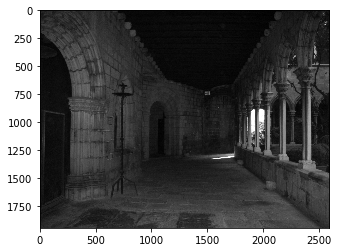

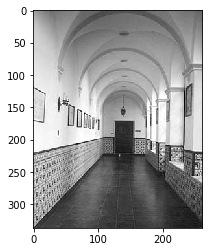

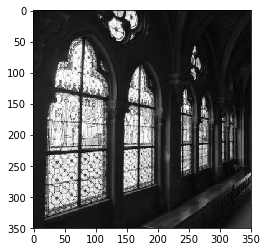

In [3]:
def plot_first(DATADIR_train):
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap='gray')
            plt.show()
            break
        break

plot_first(DATADIR_train)
plot_first(DATADIR_valid)
plot_first(DATADIR_test)

**Processing and saving data into variables**

In [4]:
img_size = 100
training_data = []
validation_data = []
testing_data = []

def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
def create_validation_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_valid, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def create_testing_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_test, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()
create_validation_data()
create_testing_data()

In [5]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

10970
2310
2310


In [6]:
import random
random.shuffle(training_data)
random.shuffle(validation_data)
random.shuffle(testing_data)

**Plotting processed data** 

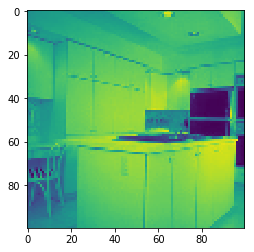

-------------- 8 -------------


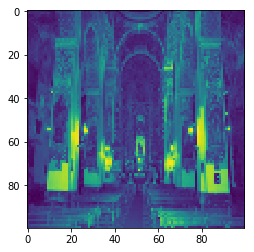

-------------- 51 -------------


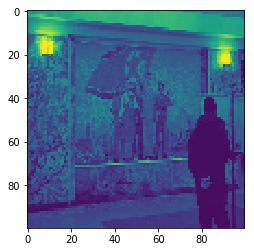

-------------- 30 -------------


In [7]:
def visualize(training_data):
    for sample in training_data[:1]:
        plt.imshow(sample[0])
        plt.show()
        print("--------------",sample[1],"-------------")  

visualize(training_data)
visualize(validation_data)
visualize(testing_data)

In [8]:
x_train = []
y_train = []
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
 
x_valid = []
y_valid = []
for features,label in validation_data:
    x_valid.append(features)
    y_valid.append(label)

x_test = []
y_test = []
for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
    

X_train = np.array(x_train).reshape(-1,img_size,img_size,1)
X_valid = np.array(x_valid).reshape(-1,img_size,img_size,1)
X_test = np.array(x_test).reshape(-1,img_size,img_size,1)

In [9]:
X_train = X_train.astype('float32')
X_train /= 255
print(X_train.shape)
print(X_train.shape[0], 'train_samples')

(10970, 100, 100, 1)
10970 train_samples


In [10]:
X_valid = X_valid.astype('float32')
X_valid /= 255
print(X_valid.shape)
print(X_valid.shape[0], 'valid_samples')

(2310, 100, 100, 1)
2310 valid_samples


In [11]:
X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape)
print(X_test.shape[0], 'test_samples')

(2310, 100, 100, 1)
2310 test_samples


In [12]:
Y_train = np_utils.to_categorical(y_train,67)
Y_valid = np_utils.to_categorical(y_valid,67)
Y_test = np_utils.to_categorical(y_test,67)

**Creating the model**

In [15]:
batch_size = 25
epochs = 20
channels = 1
conv = 3
maxpool = 2
filters = 32
classes = 67

model = Sequential() 
model.add(Convolution2D(filters,(conv,conv),border_mode='valid',input_shape=(img_size,img_size,1)))
convout1=Activation('relu')
model.add(convout1)
model.add(Convolution2D(filters,conv,conv))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size= (maxpool, maxpool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
__________

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


**Training the model**

In [16]:
import time

t0= time.time()
history = model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=epochs, 
          verbose=1,validation_data=(X_valid,Y_valid))

print(time.time()-t0)

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 10970 samples, validate on 2310 samples
Epoch 1/20
10970/10970 [==============================] - 21s 2ms/step - loss: 3.9184 - acc: 0.0685 - val_loss: 3.6848 - val_acc: 0.1000
Epoch 2/20
10970/10970 [==============================] - 20s 2ms/step - loss: 3.5382 - acc: 0.1287 - val_loss: 3.4384 - val_acc: 0.1623
Epoch 3/20
10970/10970 [==============================] - 19s 2ms/step - loss: 2.9122 - acc: 0.2434 - val_loss: 3.3918 - val_acc: 0.1753
Epoch 4/20
10970/10970 [==============================] - 19s 2ms/step - loss: 2.1954 - acc: 0.3926 - val_loss: 3.6512 - val_acc: 0.1506
Epoch 5/20
10970/10970 [==============================] - 19s 2ms/step - loss: 1.6437 - acc: 0.5289 - val_loss: 3.8730 - val_acc: 0.1658
Epoch 6/20
10970/10970 [==============================] - 19s 2ms/step - loss: 1.2337 - acc: 0.6345 - val_loss: 4.1805 - val_acc: 0.1571
Epoch 7/20
10970/10970 [==============================] - 20s 2ms/step - loss: 0.9987 - acc: 0.6934 - val_loss: 4.4188 - val_acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


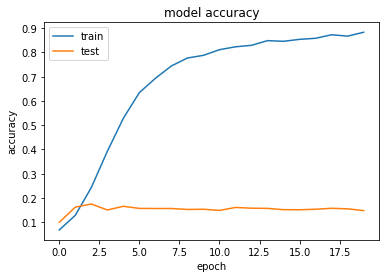

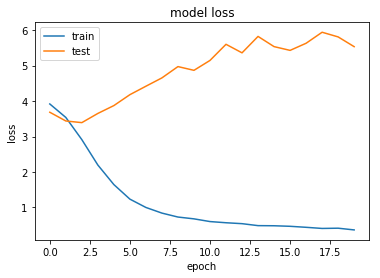

In [17]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Evaluating the model**

In [18]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  5.030727538401947
Test accuracy:  0.12987012988303132


In [19]:
print(model.predict_classeTrain on 10970 samples, validate on 2310 samples
Epoch 1/20
10970/10970 [==============================] - 21s 2ms/step - loss: 3.9184 - acc: 0.0685 - val_loss: 3.6848 - val_acc: 0.1000
Epoch 2/20
10970/10970 [==============================] - 20s 2ms/step - loss: 3.5382 - acc: 0.1287 - val_loss: 3.4384 - val_acc: 0.1623
Epoch 3/20
10970/10970 [==============================] - 19s 2ms/step - loss: 2.9122 - acc: 0.2434 - val_loss: 3.3918 - val_acc: 0.1753
Epoch 4/20
10970/10970 [==============================] - 19s 2ms/step - loss: 2.1954 - acc: 0.3926 - val_loss: 3.6512 - val_acc: 0.1506
Epoch 5/20
10970/10970 [==============================] - 19s 2ms/step - loss: 1.6437 - acc: 0.5289 - val_loss: 3.8730 - val_acc: 0.1658
Epoch 6/20s(X_test[1:6]))
print(Y_test[1:6])

[ 1 44  8 20 30]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0